In [173]:
# For data manipulation
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 200)

#Use Z-score to scale data
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform k-means clustering, compute metric
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to perform PCA
from sklearn.decomposition import PCA

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# For Visulization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer



In [2]:
df = pd.read_csv("stock_data.csv")
df.shape


(340, 15)

In [3]:
df.sample(20)

Ticker Symbol                       Security             GICS Sector   
68            CMA                  Comerica Inc.              Financials  \
323           WMB                  Williams Cos.                  Energy   
215           MRK                    Merck & Co.             Health Care   
313          VRSK               Verisk Analytics             Industrials   
3            ADBE              Adobe Systems Inc  Information Technology   
266           ROP               Roper Industries             Industrials   
199           MAS                    Masco Corp.             Industrials   
321           WHR                Whirlpool Corp.  Consumer Discretionary   
281           STI                 SunTrust Banks              Financials   
64           CHTR         Charter Communications  Consumer Discretionary   
311           VMC               Vulcan Materials               Materials   
66           CINF           Cincinnati Financial              Financials   
22            AMG  Affiliated Managers Group Inc              Financials   
169           IPG              Interpublic Group  Consumer Discretionary   
123             F                     Ford Motor  Consumer Discretionary   
274           SLG                SL Green Realty             Real Estate   
117           ETR                  Entergy Corp.               Utilities   
208           MLM      Martin Marietta Materials               Materials   
334           XYL                     Xylem Inc.             Industrials   
336           YUM                Yum! Brands Inc  Consumer Discretionary   

                      GICS Sub Industry  Current Price  Price Change   
68                       Regional Banks      41.830002      1.900129  \
323  Oil & Gas Exploration & Production      25.700001    -30.988186   
215                     Pharmaceuticals      52.820000      7.031413   
313      Research & Consulting Services      76.879997     -1.448539   
3                  Application Software      93.940002     13.977195   
266            Industrial Conglomerates     189.789993     20.432767   
199                   Building Products      28.299999     11.637077   
321                Household Appliances     146.869995     -0.230971   
281                               Banks      42.840000     11.970732   
64                    Cable & Satellite     183.100006      3.598507   
311              Construction Materials      94.970001      6.028805   
66        Property & Casualty Insurance      59.169998      9.777358   
22     Asset Management & Custody Banks     159.759995     -6.611335   
169                         Advertising      23.280001     21.821035   
123            Automobile Manufacturers      14.090000      2.398256   
274                        Office REITs     112.980003      4.004424   
117                  Electric Utilities      68.360001      4.910983   
208              Construction Materials     136.580002    -10.866015   
334            Industrial Conglomerates      36.500000     11.009729   
336                         Restaurants      52.516175     -8.698917   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income   
68     1.557655    7          99       76000000   521000000  \
323    3.719560    9           4     -140000000  -571000000   
215    1.278460   10          70     1083000000  4442000000   
313    1.454019   37          10       98989000   507577000   
3      1.357679    9         180     -240840000   629551000   
266    1.058807   13         108      168081000   696067000   
199    1.428359  263          61       85000000   355000000   
321    2.397803   17          10     -254000000   783000000   
281    1.437938    8          99    -2630000000  1933000000   
64     1.697942  589           0        2000000  -271000000   
311    1.845710    5          81      142787000   221177000   
66     0.935812   10          99      -47000000   634000000   
22     2.093065   18          67       13200000   516000000   
169    1.139

In [4]:
df.info()
#There is no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [5]:
df.duplicated().any()
#And also entries are unique

False

In [6]:
#Minor fix
#Columns name cleanining, replacing all space ( ) to underscore _, and remove /
df.columns = [col.replace(' ','_') for col in df.columns]
df.columns = [col.replace('/','') for col in df.columns]

In [7]:
df.describe(include = 'all').T
# Quick overview of all datas, transpose to increase readability

count unique   
Ticker_Symbol                   340    340  \
Security                        340    340   
GICS_Sector                     340     11   
GICS_Sub_Industry               340    104   
Current_Price                 340.0    NaN   
Price_Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash_Ratio                    340.0    NaN   
Net_Cash_Flow                 340.0    NaN   
Net_Income                    340.0    NaN   
Earnings_Per_Share            340.0    NaN   
Estimated_Shares_Outstanding  340.0    NaN   
PE_Ratio                      340.0    NaN   
PB_Ratio                      340.0    NaN   

                                                             top freq   
Ticker_Symbol                                                AAL    1  \
Security                                 American Airlines Group    1   
GICS_Sector                                          Industrials   53   
GICS_Sub_Industry             Oil & Gas Exploration & Production   16   
Current_Price                                                NaN  NaN   
Price_Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash_Ratio                                                   NaN  NaN   
Net_Cash_Flow                                                NaN  NaN   
Net_Income                                                   NaN  NaN   
Earnings_Per_Share                                           NaN  NaN   
Estimated_Shares_Outstanding                                 NaN  NaN   
PE_Ratio                                                     NaN  NaN   
PB_Ratio                                                     NaN  NaN   

                                           mean                std   
Ticker_Symbol                               NaN                NaN  \
Security                                    NaN                NaN   
GICS_Sector                                 NaN                NaN   
GICS_Sub_Industry                           NaN                NaN   
Current_Price                         80.862345          98.055086   
Price_Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash_Ratio                            70.023529          90.421331   
Net_Cash_Flow                   55537620.588235  1946365312.175789   
Net_Income                    1494384602.941176  3940150279.327936   
Earnings_Per_Share                     2.776662           6.587779   
Estimated_Shares_Outstanding    577028337.75403   845849595.417695   
PE_Ratio                              32.612563          44.348731   
PB_Ratio                              -1.718249          13.966912   

                                        min          25%          50%   
Ticker_Symbol                           NaN          NaN          NaN  \
Security                                NaN          NaN          NaN   
GICS_Sector                             NaN          NaN          NaN   
GICS_Sub_Industry                       NaN          NaN          NaN   
Current_Price                           4.5       38.555       59.705   
Price_Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash_Ratio                              0.0         18.0         47.0   
Net_Cash_Flow                -11208000000.0 -193906500.0    2098000.0   
Net_Income                   -23528000000.0  352301250.0  707336000.0   
Earnings_Per_Share                    -61.2       1.5575        2.895   
Estimated_Shares_Outstanding    27672156.86  158848216

In [45]:
#FORMAL EDA

def histo_boxplot(df,feature,figsize = (12,7),kde = False, bins = None):
    """
    df: dataframe
    feature:columns to be inspect
    figsize:matplotlib parameter to define figure size, set to 12,7 
    kde: Whether to show density curve
    bins: how many bins to be use in the histogram
    """
    fig,(ax_box,ax_hist) = plt.subplots(
        nrows = 2,
        sharex= True,
        gridspec_kw={'height_ratios':(0.2,.8)},
        figsize = figsize
    )
    sns.boxplot(data = df,x=feature, ax = ax_box,showmeans = True)
    sns.histplot(data = df,x=feature, ax = ax_hist,bins = bins,kde = kde)
    ax_hist.axvline(
        df[feature].mean(), color="red"
    )  # Add mean to the histogram
    ax_hist.axvline(
        df[feature].median(), color="black"
    )  # Add median to the histogram
    
    


In [46]:
num_col = df.select_dtypes(np.number).columns.to_list()

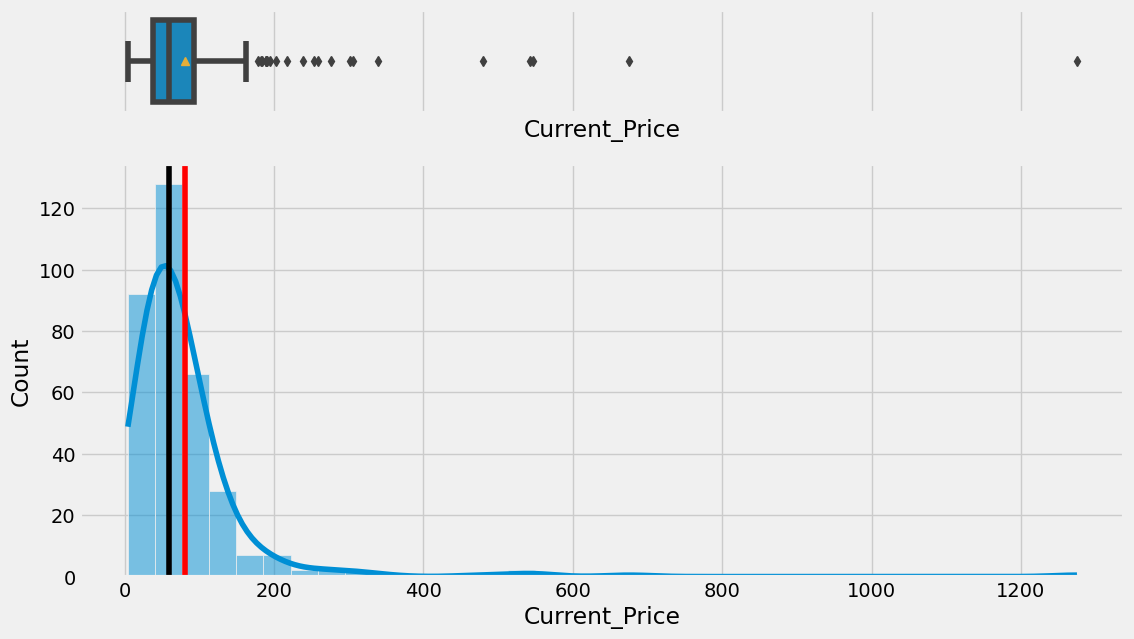

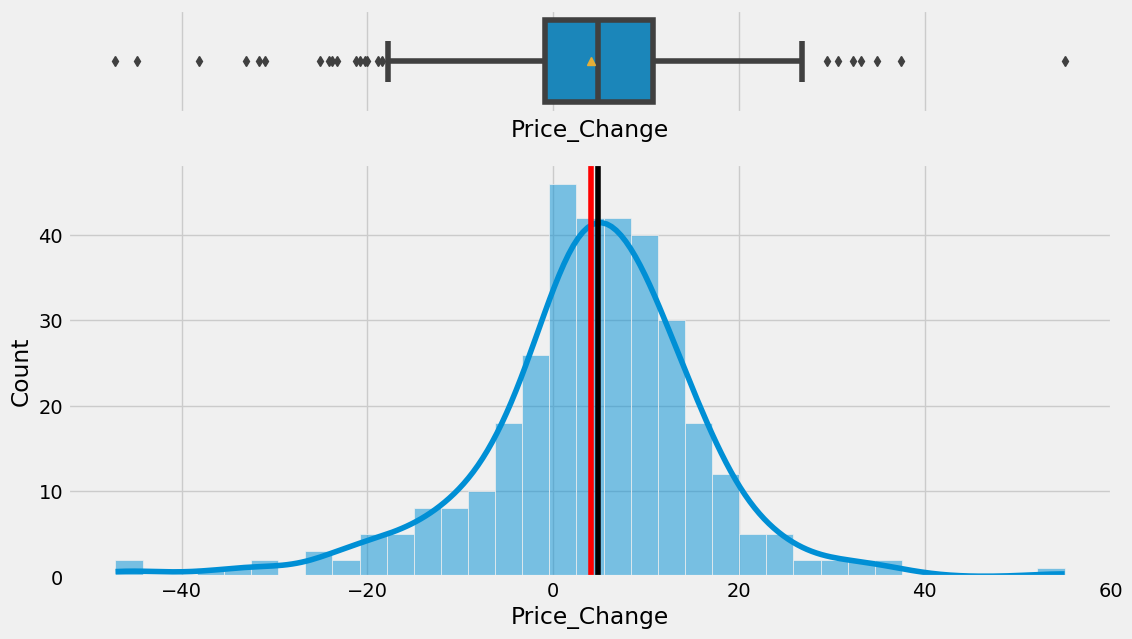

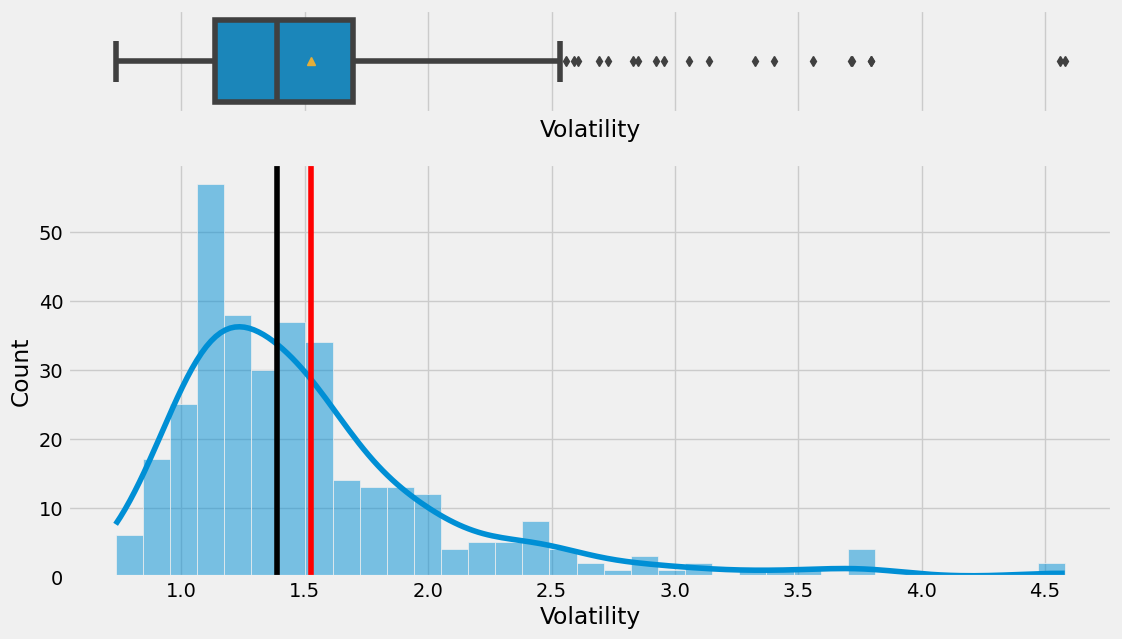

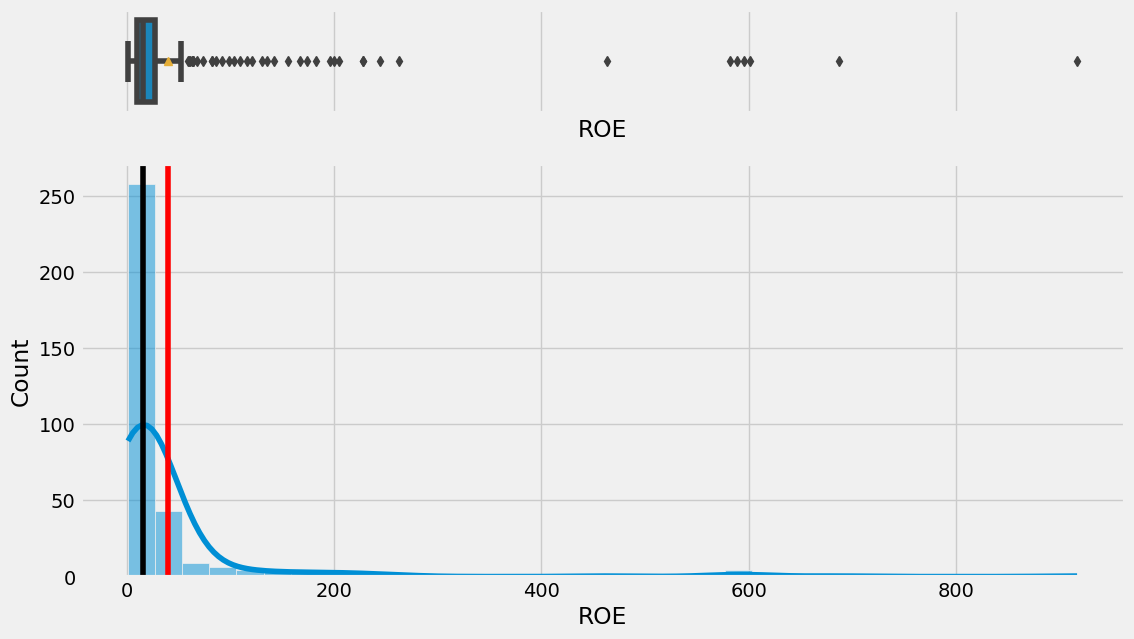

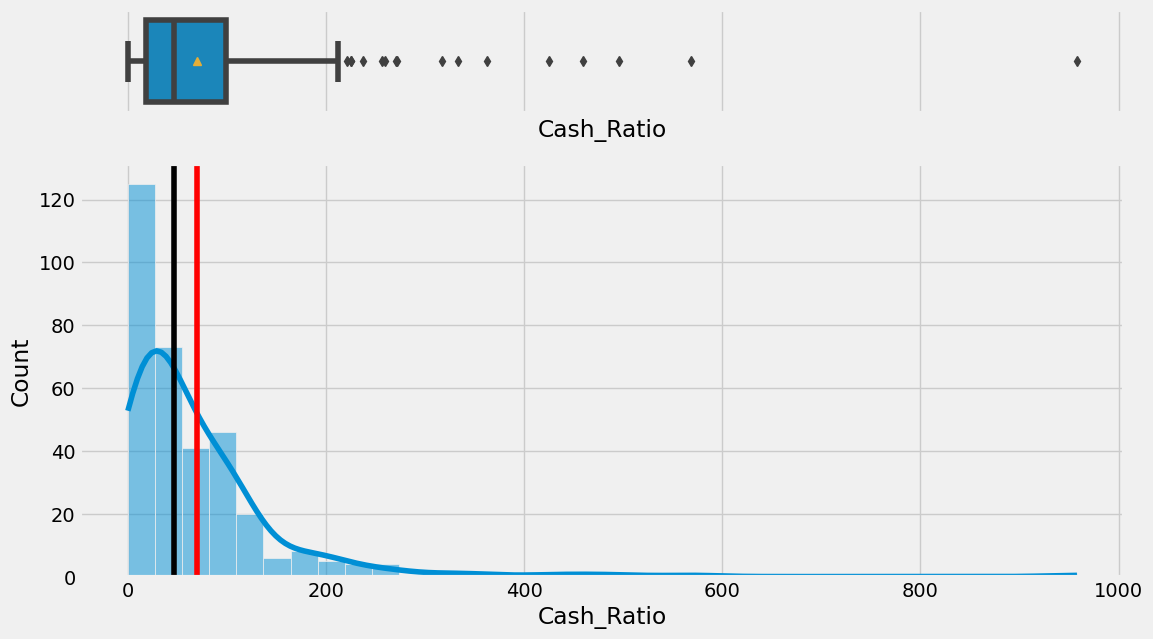

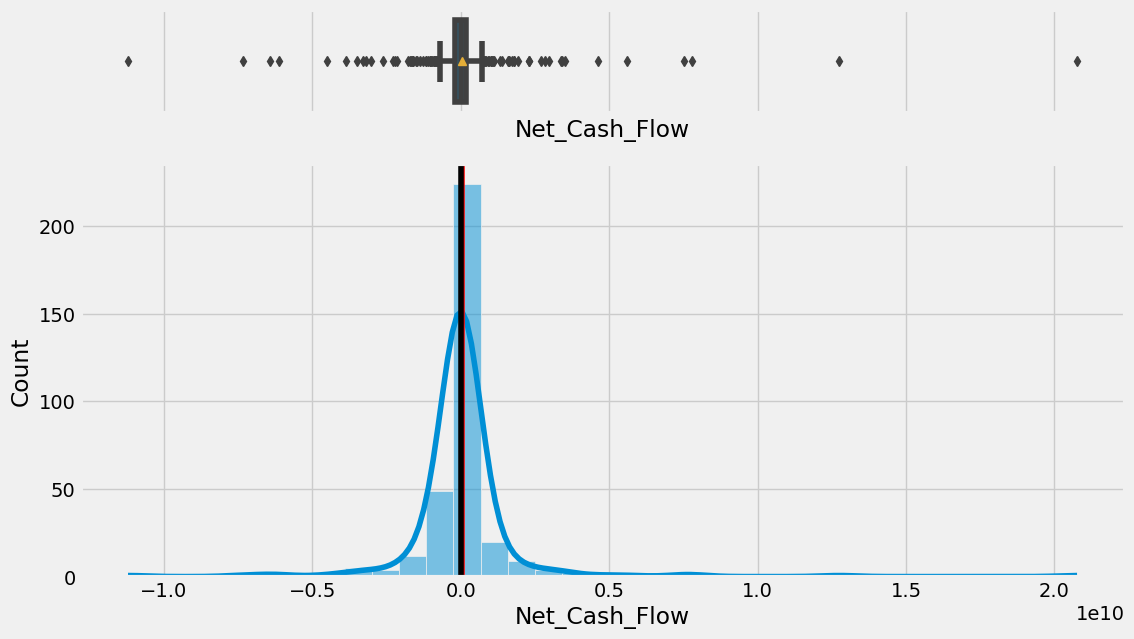

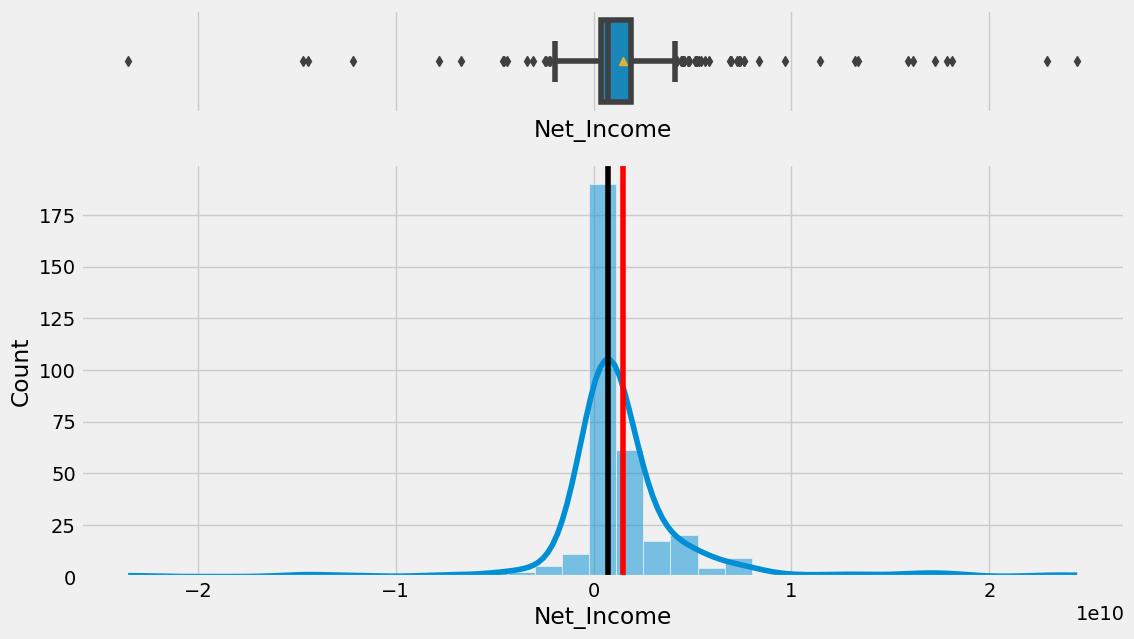

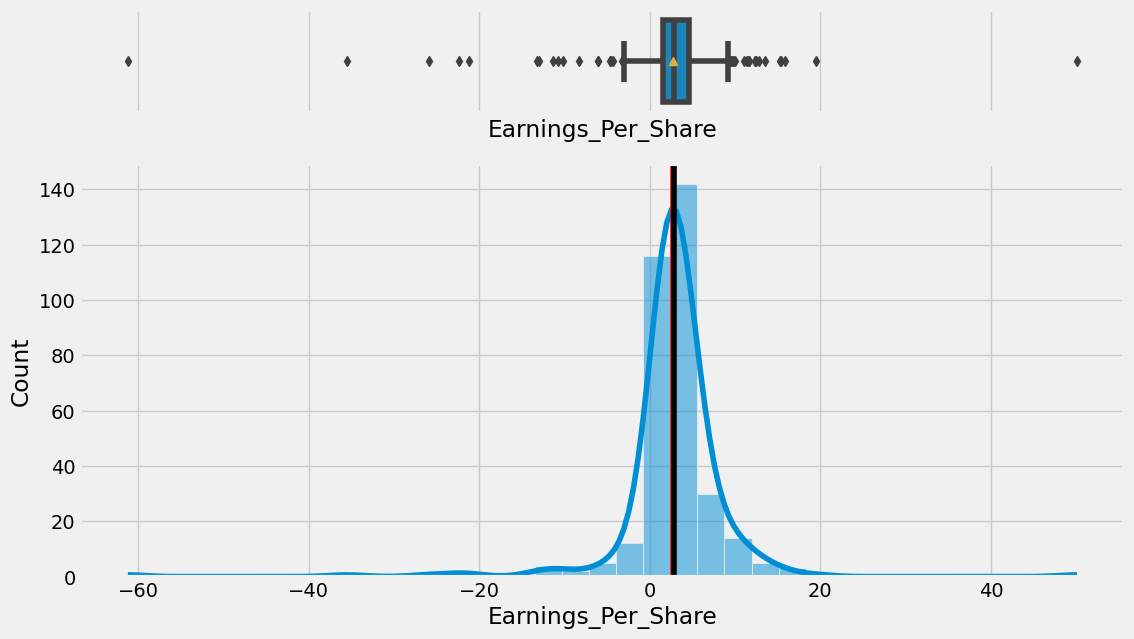

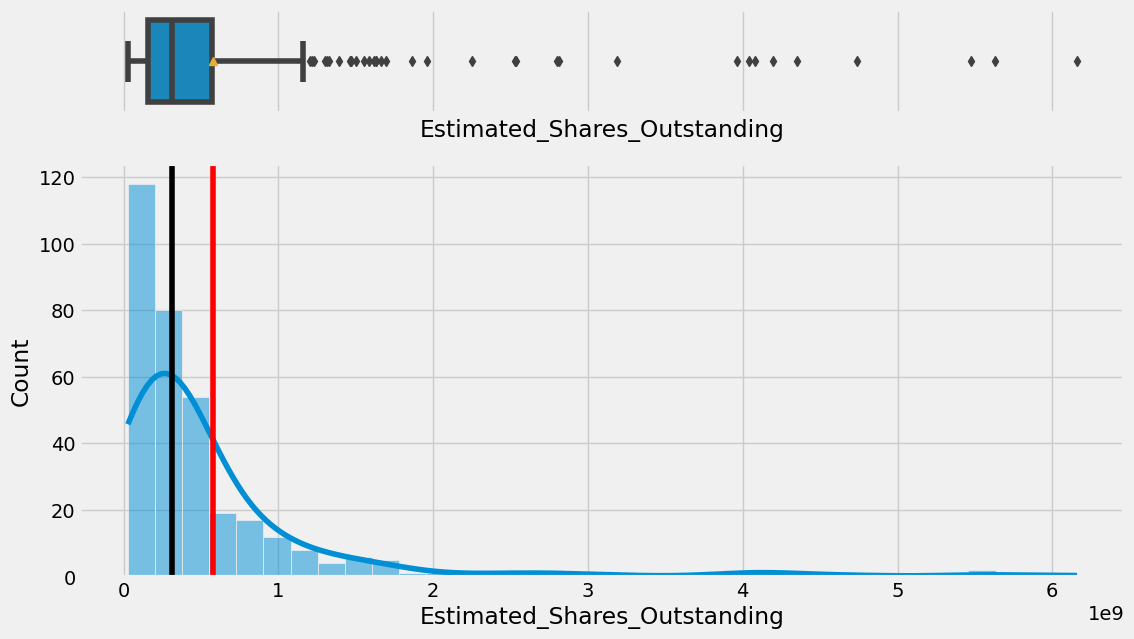

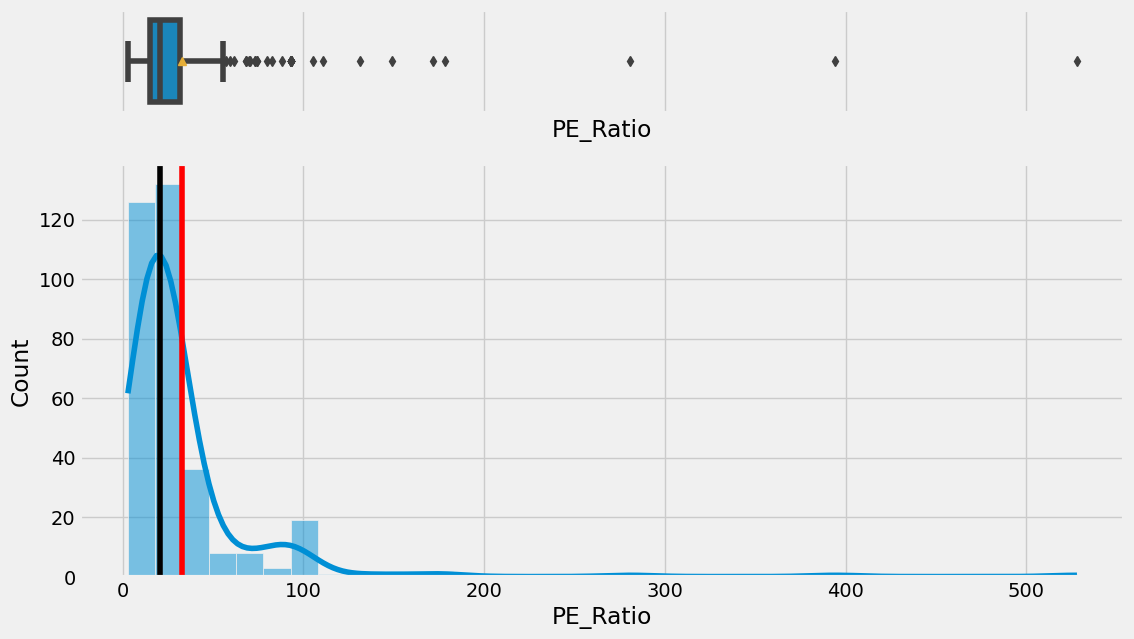

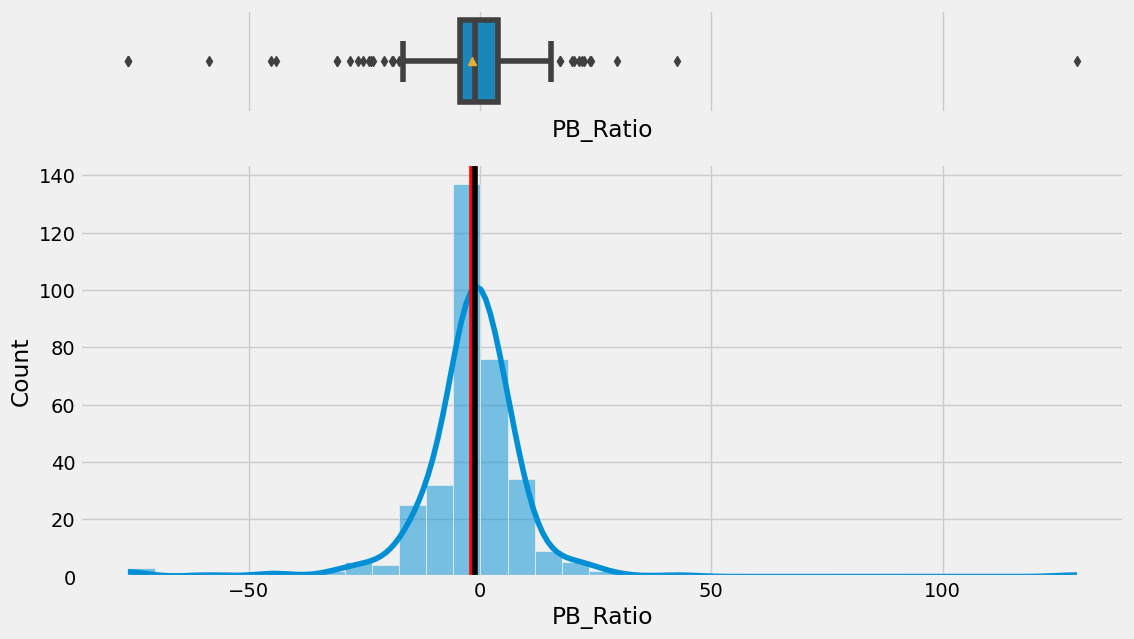

In [57]:
for col in num_col:
    histo_boxplot(df,feature = col,bins = 35,kde = True)

<Axes: >

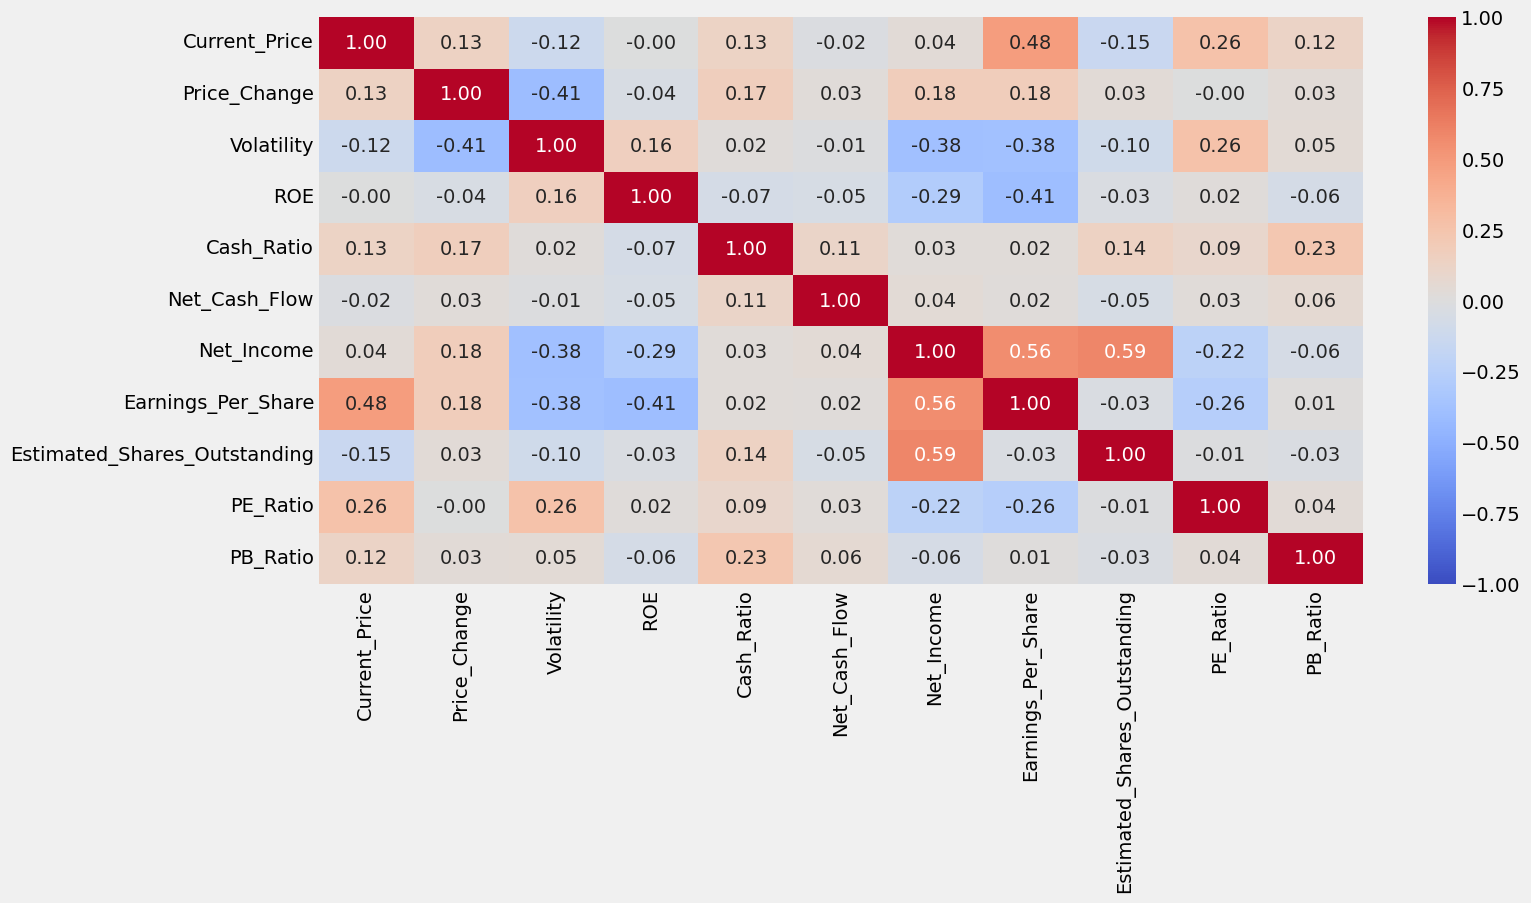

In [61]:
# check for correlations

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[num_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="coolwarm"
)

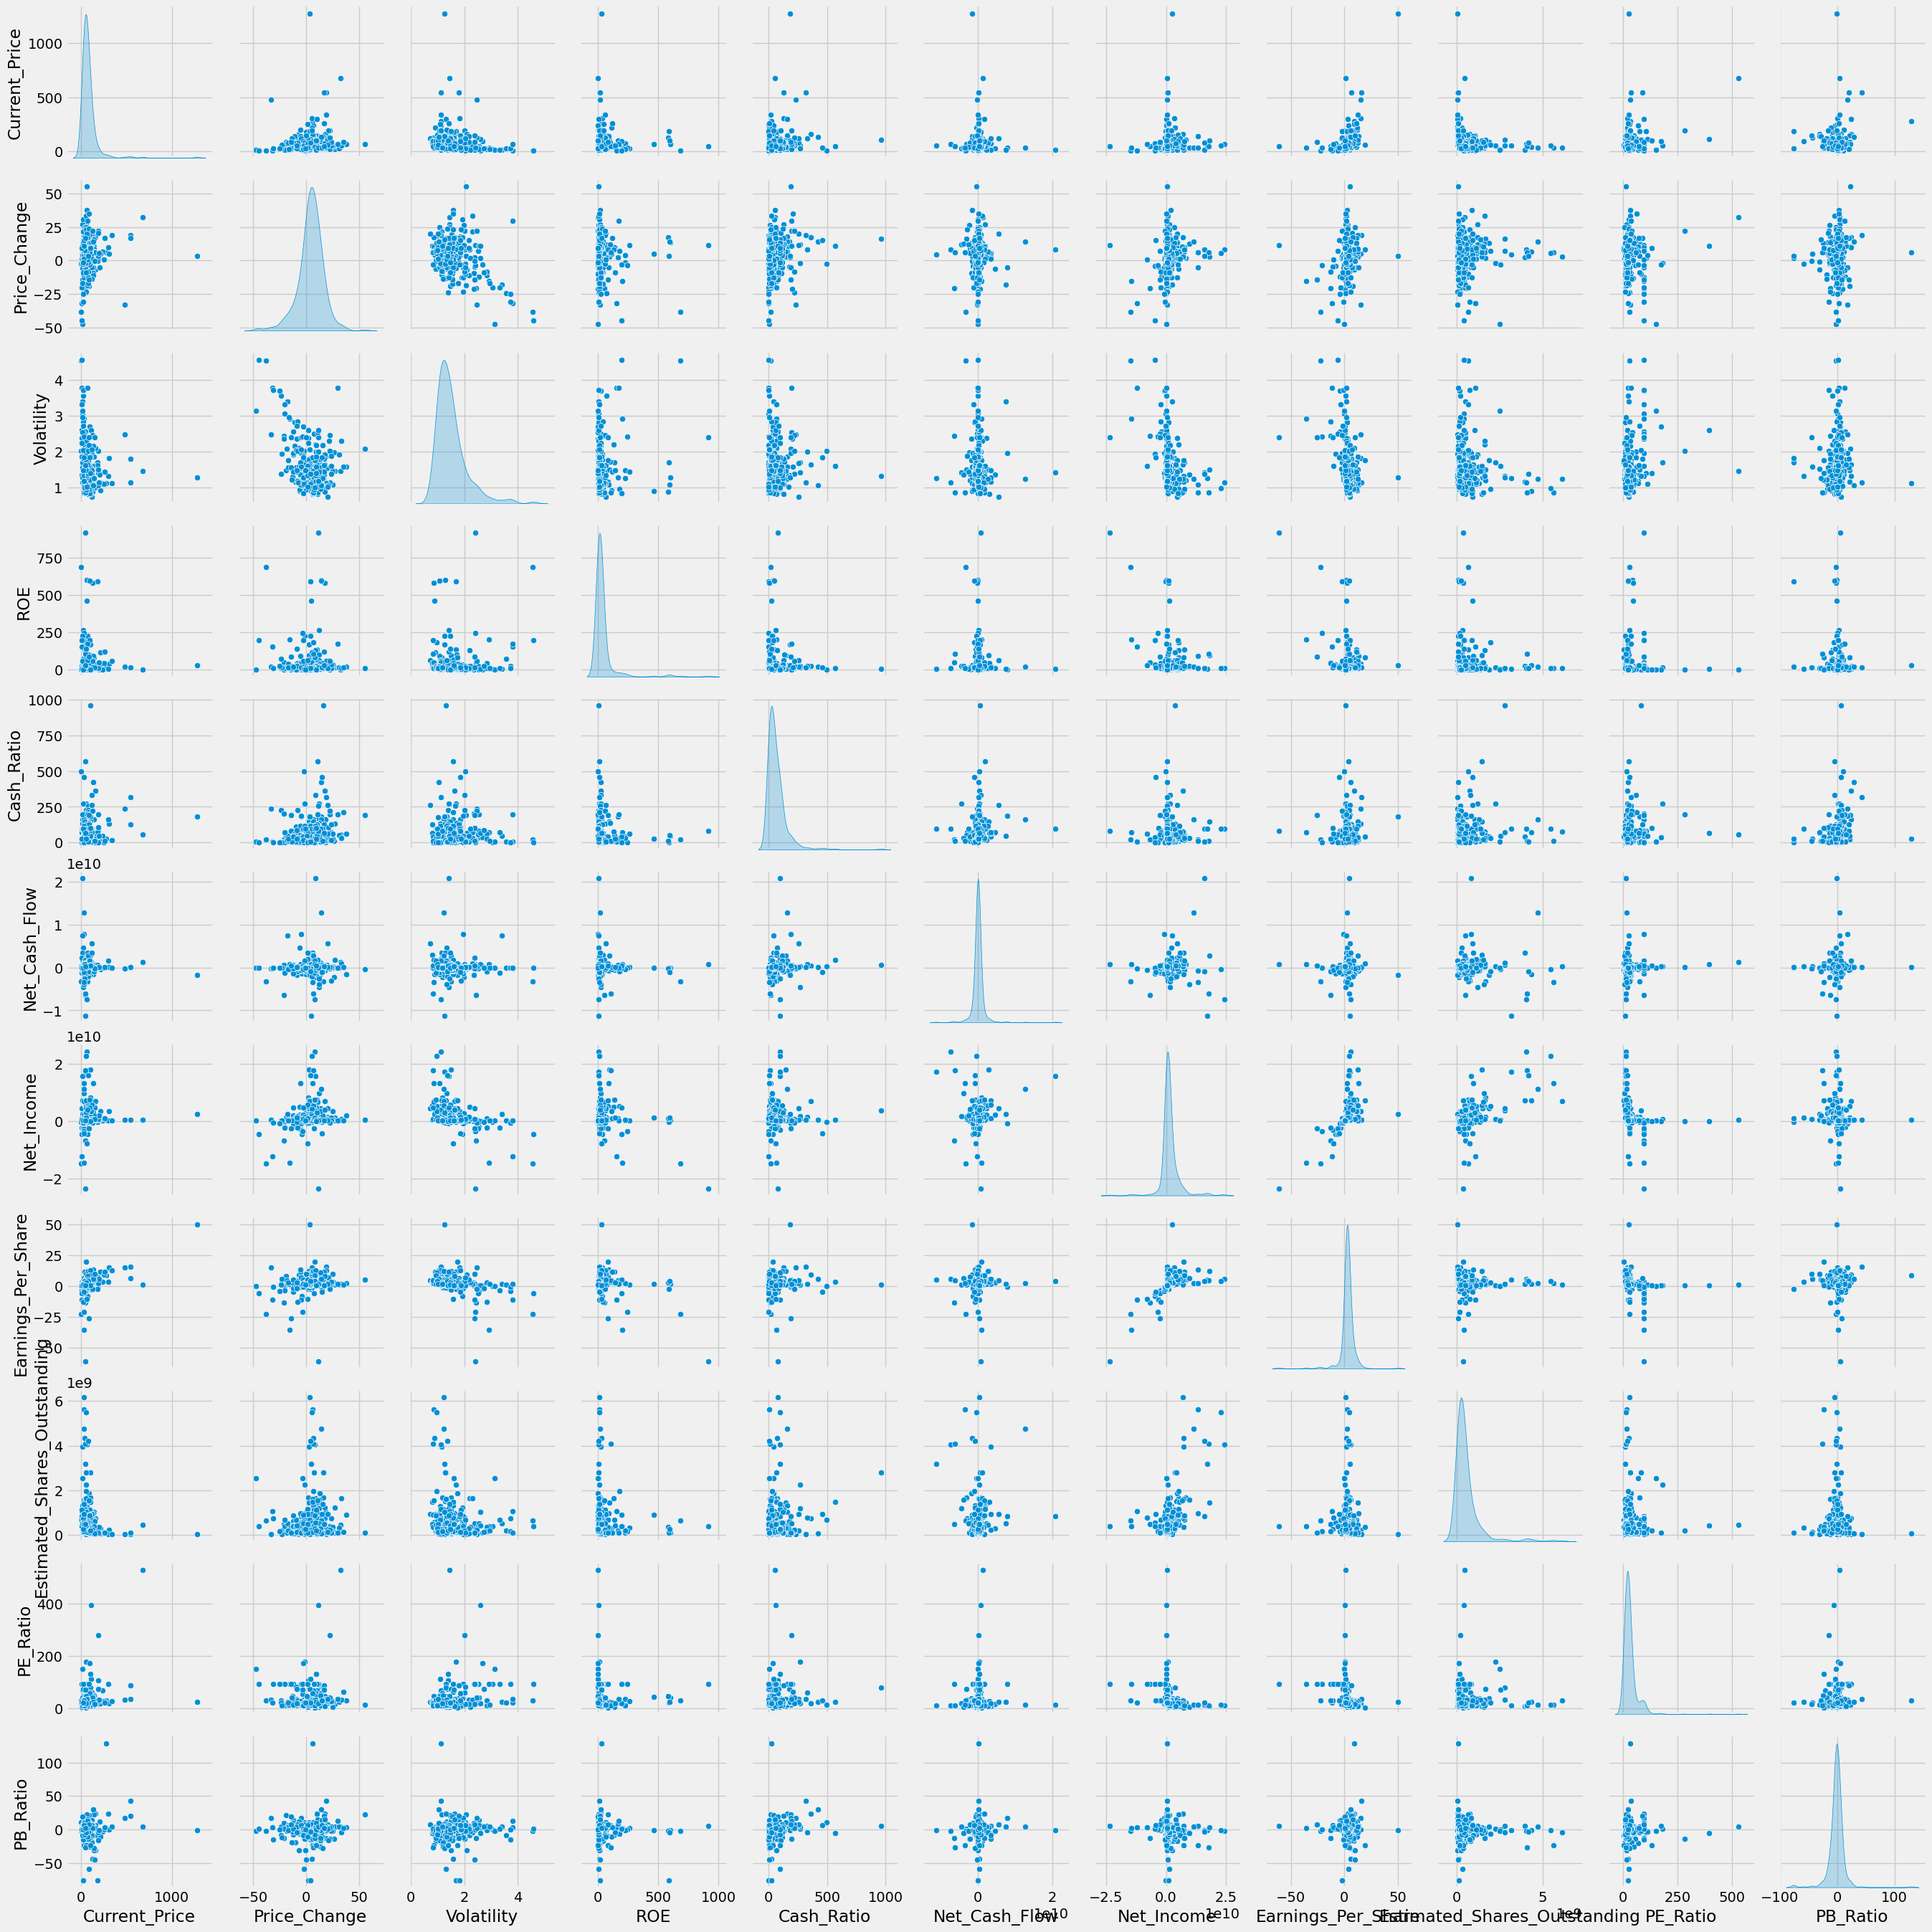

In [62]:
sns.pairplot(df[num_cols],diag_kind="kde")


In [66]:
df

Ticker_Symbol                 Security             GICS_Sector   
0             AAL  American Airlines Group             Industrials  \
1            ABBV                   AbbVie             Health Care   
2             ABT      Abbott Laboratories             Health Care   
3            ADBE        Adobe Systems Inc  Information Technology   
4             ADI     Analog Devices, Inc.  Information Technology   
..            ...                      ...                     ...   
335          YHOO               Yahoo Inc.  Information Technology   
336           YUM          Yum! Brands Inc  Consumer Discretionary   
337           ZBH   Zimmer Biomet Holdings             Health Care   
338          ZION            Zions Bancorp              Financials   
339           ZTS                   Zoetis             Health Care   

                GICS_Sub_Industry  Current_Price  Price_Change  Volatility   
0                        Airlines      42.349998      9.999995    1.687151  \
1                 Pharmaceuticals      59.240002      8.339433    2.197887   
2           Health Care Equipment      44.910000     11.301121    1.273646   
3            Application Software      93.940002     13.977195    1.357679   
4                  Semiconductors      55.320000     -1.827858    1.701169   
..                            ...            ...           ...         ...   
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share   
0    135          51     -604000000  7610000000               11.39  \
1    130          77       51000000  5144000000                3.15   
2     21          67      938000000  4423000000                2.94   
3      9         180     -240840000   629551000                1.26   
4     14         272      315120000   696878000                0.31   
..   ...         ...            ...         ...                 ...   
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated_Shares_Outstanding    PE_Ratio   PB_Ratio  
0                    6.681299e+08    3.718174  -8.784219  
1                    1.633016e+09   18.806350  -8.750068  
2                    1.504422e+09   15.275510  -0.394171  
3                    4.996437e+08   74.555557   4.199651  
4                    2.247994e+09  178.451613   1.059810  
..                            ...         ...        ...  
335                  9.394573e+08   28.976191   6.261775  
336                  4.353535e+08   17.682214  -3.838260  
337                  1.884615e+08  131.525636 -23.884449  
338                  2.578925e+08   22.749999  -0.063096  
339                  4.985294e+08   70.470585   1.723068  

[340 rows x 15 columns]

In [117]:
#GICS_Sector  and sub_sector count

x = pd.DataFrame(df['GICS_Sector'].value_counts()).index
y = pd.DataFrame(df['GICS_Sector'].value_counts())['count'].to_list()

In [142]:
def barplot_count(df, feature,figsize = (13,9)):
    plt.figure(figsize= figsize)
    x = pd.DataFrame(df[feature].value_counts()).index
    y = pd.DataFrame(df[feature].value_counts())['count'].to_list()
    plt.xticks(rotation = 90)
    sns.barplot(x = x,y = y)

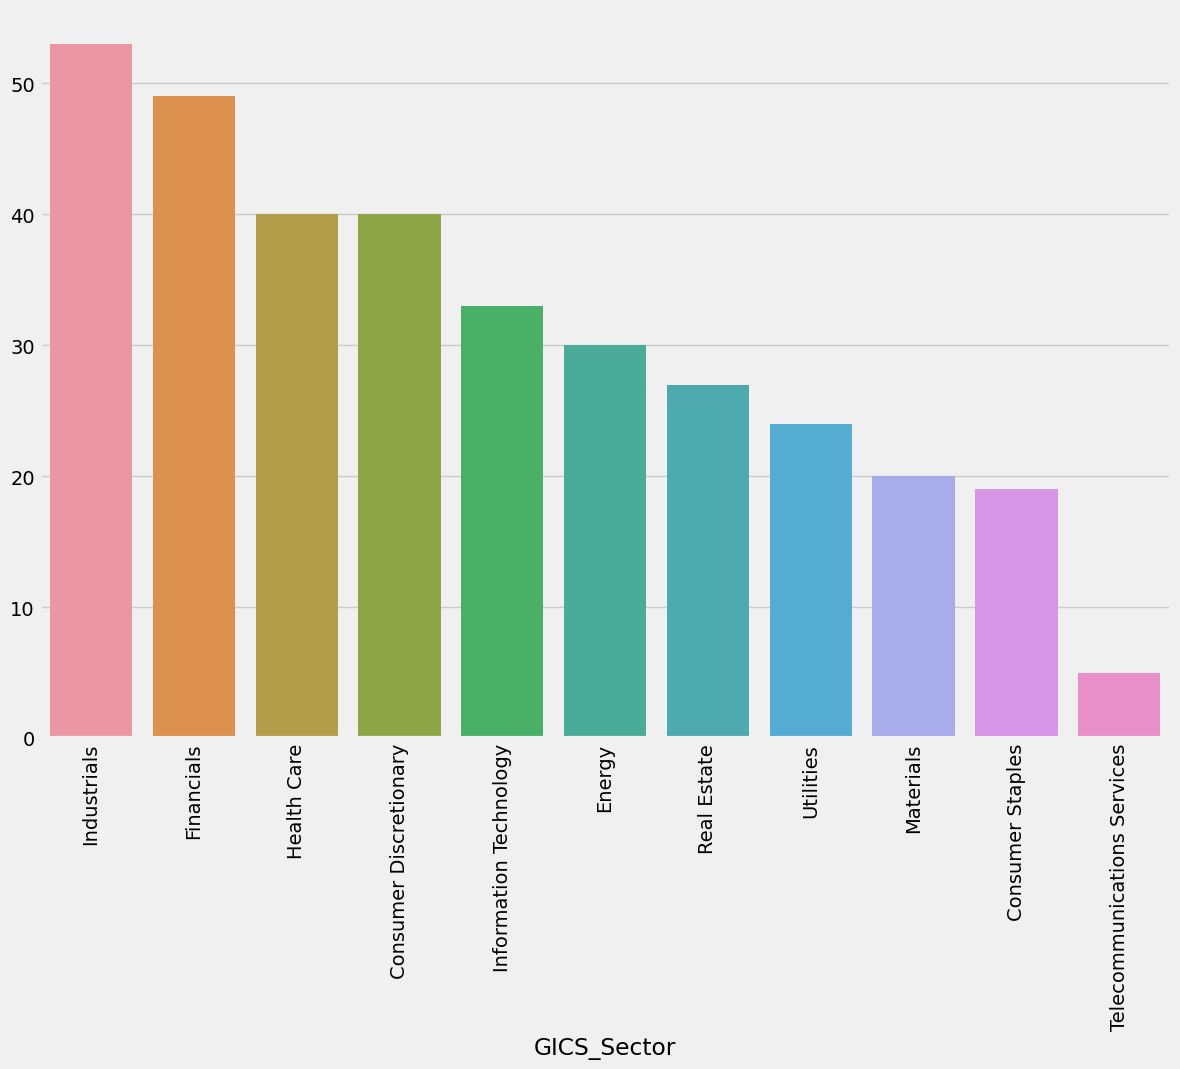

In [143]:
barplot_count(df = df,feature ='GICS_Sector' )

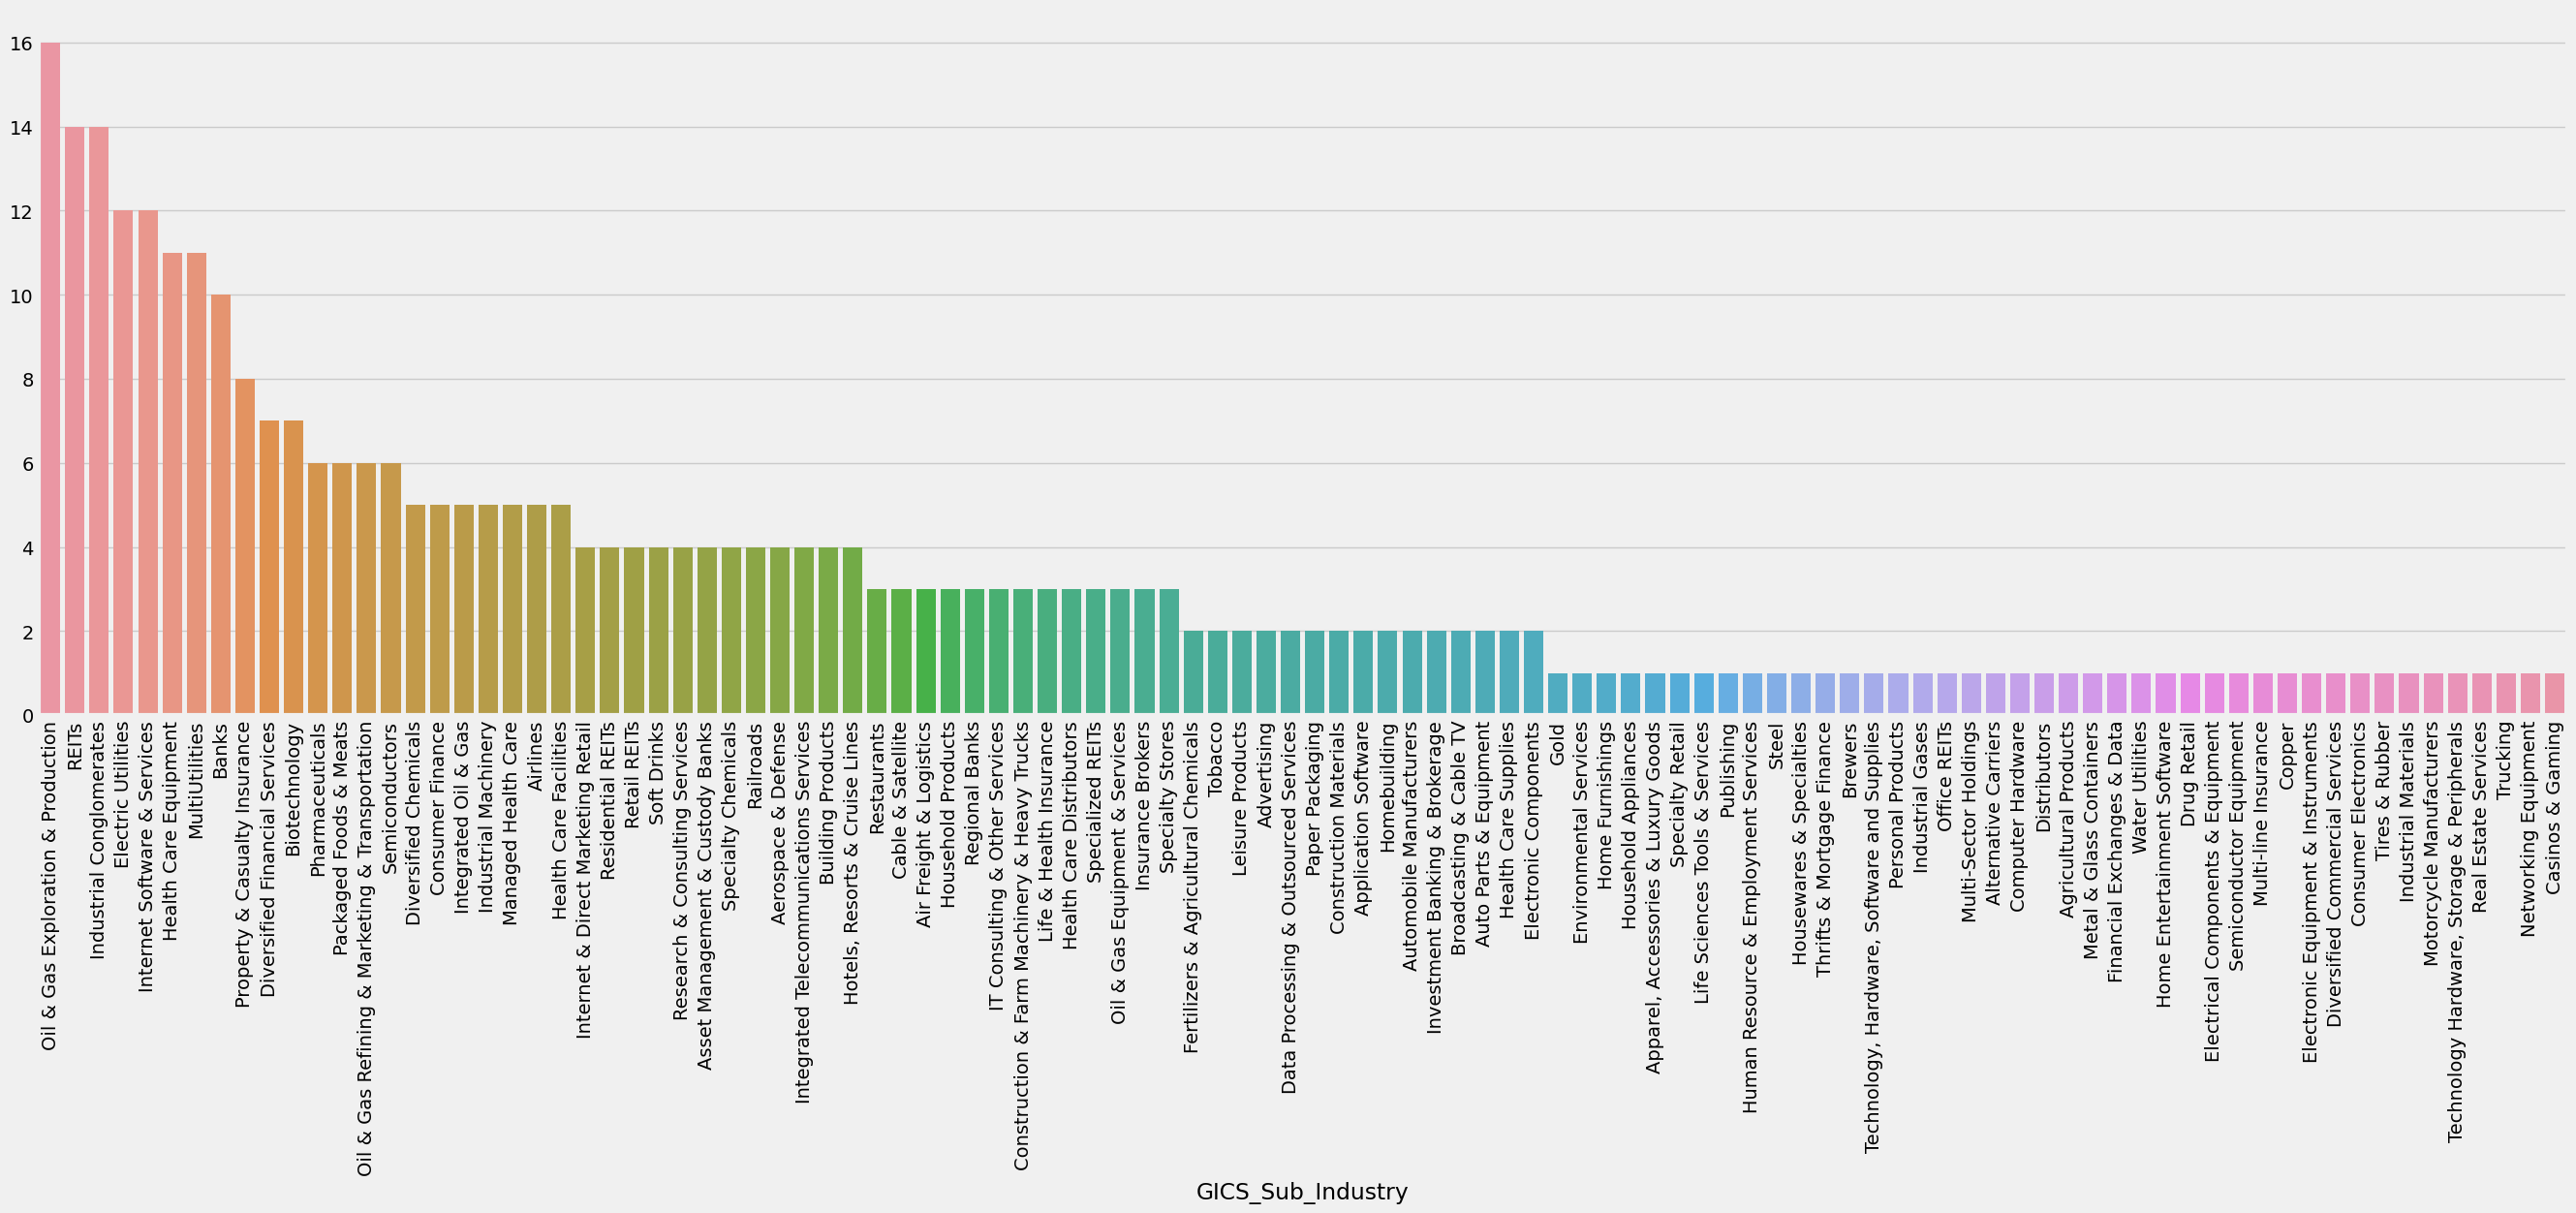

In [144]:
barplot_count(df = df,feature ='GICS_Sub_Industry',figsize=(30,9))

In [267]:
#Data preprocessing
cat_col = df.select_dtypes('object').columns.to_list()
sc = StandardScaler()
df_scaled = pd.DataFrame(
    sc.fit_transform(df.drop(cat_col,axis = 1 )),
    columns=df.drop(cat_col, axis=1).columns)

In [268]:
df_scaled

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio   
0        -0.393341      0.493950    0.272749  0.989601   -0.210698  \
1        -0.220837      0.355439    1.137045  0.937737    0.077269   
2        -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3         0.133567      0.825696   -0.284802 -0.317379    1.218059   
4        -0.260874     -0.492636    0.296470 -0.265515    2.237018   
..             ...           ...         ...       ...         ...   
335      -0.486181      0.901646    0.540121 -0.255142    4.308162   
336      -0.289510     -1.065766   -0.079703  1.062211   -0.476513   
337       0.221913      0.439539   -0.206067 -0.400362    0.332009   
338      -0.547053     -0.436811   -0.097813 -0.369243    0.320933   
339      -0.336453      1.051046    0.142671 -0.078803   -0.055639   

     Net_Cash_Flow  Net_Income  Earnings_Per_Share   
0        -0.339355    1.554415            1.309399  \
1        -0.002335    0.927628            0.056755   
2         0.454058    0.744371            0.024831   
3        -0.152497   -0.219816           -0.230563   
4         0.133564   -0.202703           -0.374982   
..             ...         ...                 ...   
335      -0.559673   -1.487784           -1.127481   
336       0.053235   -0.051186            0.029391   
337       0.164889   -0.342467           -0.303532   
338      -0.051022   -0.301171           -0.239684   
339       0.111378   -0.293666           -0.318734   

     Estimated_Shares_Outstanding  PE_Ratio  PB_Ratio  K_means_segments  
0                        0.107863 -0.652487 -0.506653          0.462133  
1                        1.250274 -0.311769 -0.504205          0.462133  
2                        1.098021 -0.391502  0.094941          0.462133  
3                       -0.091622  0.947148  0.424333         -2.863269  
4                        1.978399  3.293307  0.199196         -2.863269  
..                            ...       ...       ...               ...  
335                      0.429111 -0.082116  0.572194         -2.863269  
336                     -0.167741 -0.337154 -0.152012          0.462133  
337                     -0.460058  2.233634 -1.589390          0.462133  
338                     -0.377852 -0.222714  0.118680          0.462133  
339                     -0.092942  0.854902  0.246754          0.462133  

[340 rows x 12 columns]

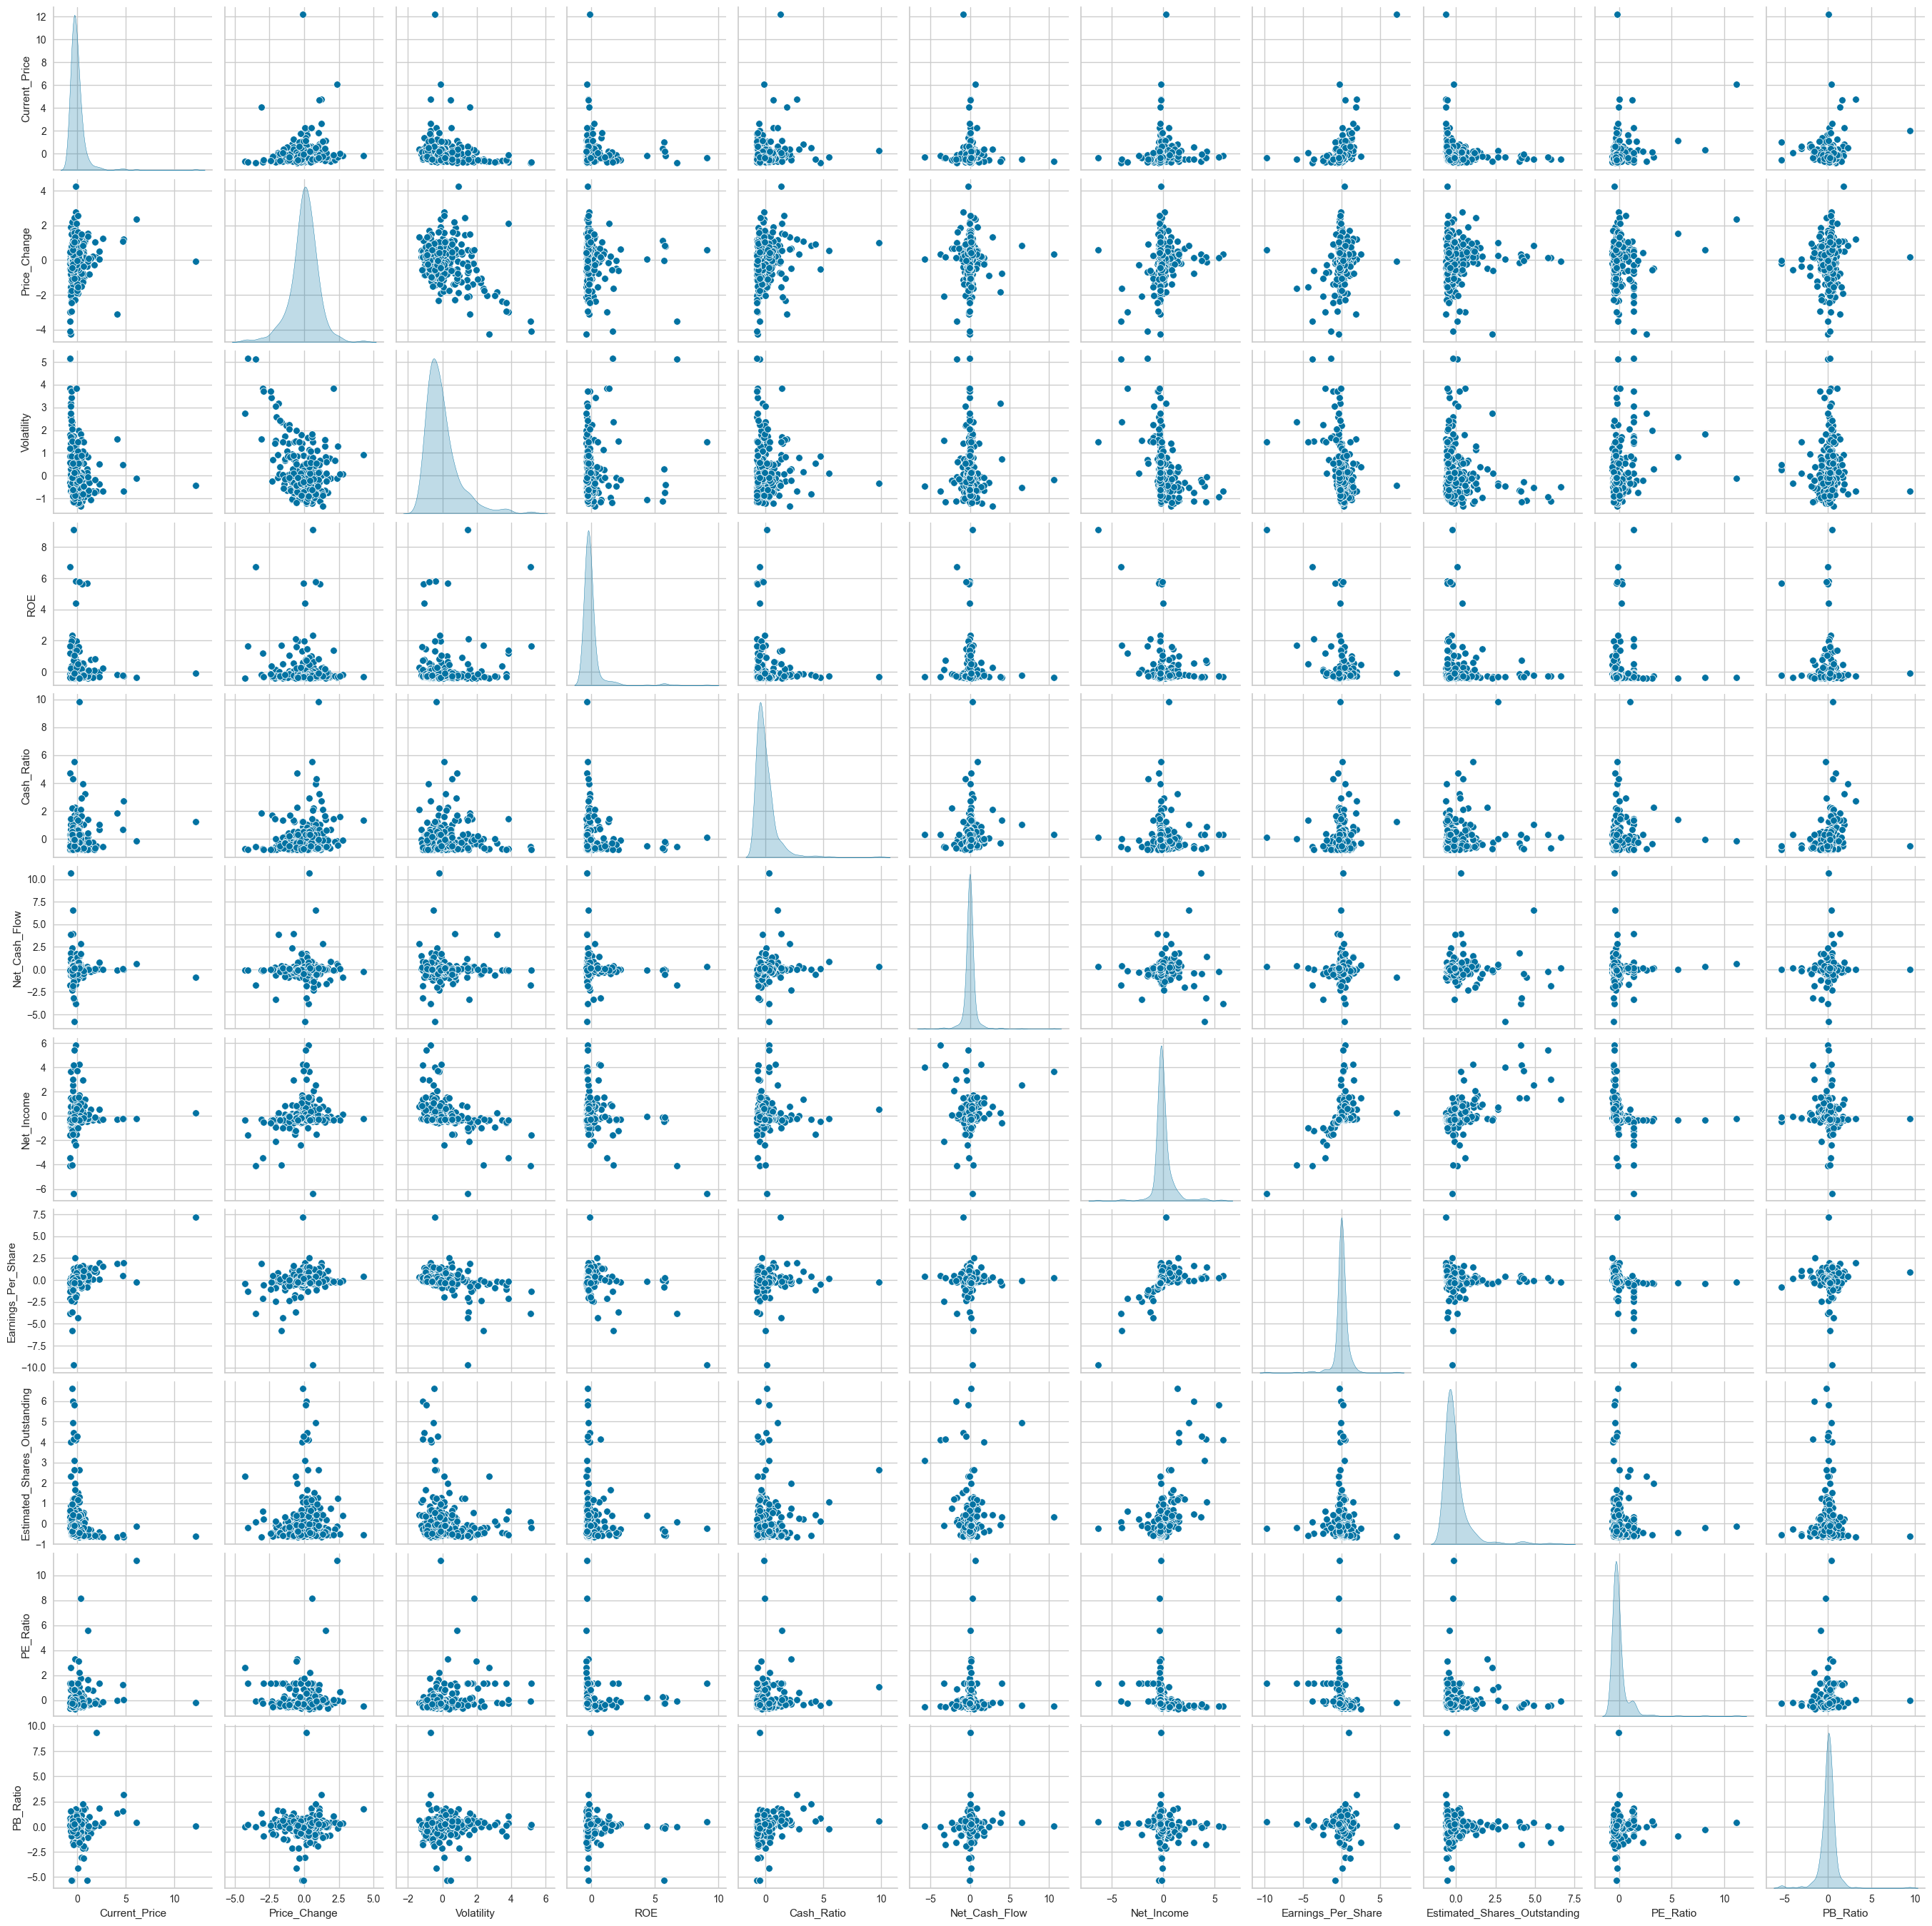

In [272]:
sns.pairplot(df_scaled[num_cols],diag_kind="kde")


In [273]:
#Above suggest we were able to maintain the colun relation and scaled it btween  0 to 1

In [279]:
cdist()

<function scipy.spatial.distance.cdist(XA, XB, metric='euclidean', *, out=None, **kwargs)>

In [293]:
model.cluster_centers_

array([[ 5.6362807 ,  0.27492376,  0.02600488, -0.21019273,  0.97808733,
        -0.04094876, -0.14919648,  2.05125666, -0.53425039,  2.04222225,
         2.65832754, -0.36921743],
       [-0.10525728, -0.07124667, -0.04767962, -0.03819083, -0.2213979 ,
        -0.03708798, -0.07345511,  0.02631737, -0.16891486, -0.10311127,
        -0.10144489,  0.33249876],
       [-0.03100359,  0.66408973,  0.13671958, -0.13902341,  1.66293088,
         0.33820511,  1.0302882 , -0.0190862 ,  1.48259002,  0.43133592,
         0.36817159, -2.56305907],
       [-0.55021872, -1.5130022 ,  2.99585094,  5.84409833, -0.140552  ,
        -0.32957928, -4.84197978, -6.46135405, -0.11261866,  0.87879916,
         0.24069956, -1.20056795]])

In [292]:
cdist(df_scaled, model.cluster_centers_, 'euclidean')

array([[ 7.82570242,  2.55120158,  4.52143136, 11.91863861],
       [ 7.88882597,  2.42519811,  3.93153294, 10.66068238],
       [ 7.64049263,  1.83831081,  3.66931117, 11.50820174],
       ...,
       [ 7.36553209,  2.9712537 ,  4.90641853, 10.97070904],
       [ 7.53522498,  0.99049348,  4.2968896 , 10.6309169 ],
       [ 7.15175647,  1.62159038,  4.11369783, 10.54644938]])

In [290]:
model =  KMeans(n_clusters=4, n_init='auto')
model.fit(df_scaled)
prediction = model.predict(df_scaled)
distortion=sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0]


2.351754620843205

In [ ]:
distortion=sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0]


When setting K as 2 the average distortion is 2.433090728524216
When setting K as 3 the average distortion is 2.289508817416845
When setting K as 4 the average distortion is 2.2417866377120372
When setting K as 5 the average distortion is 2.139061601976025
When setting K as 6 the average distortion is 2.0743300088516228
When setting K as 7 the average distortion is 2.0116020594456163
When setting K as 8 the average distortion is 1.9701682148917732
When setting K as 9 the average distortion is 1.9516667094902727
When setting K as 10 the average distortion is 1.8981668303709465
When setting K as 11 the average distortion is 1.8096114343162415


Text(0, 0.5, 'Mean Distortion')

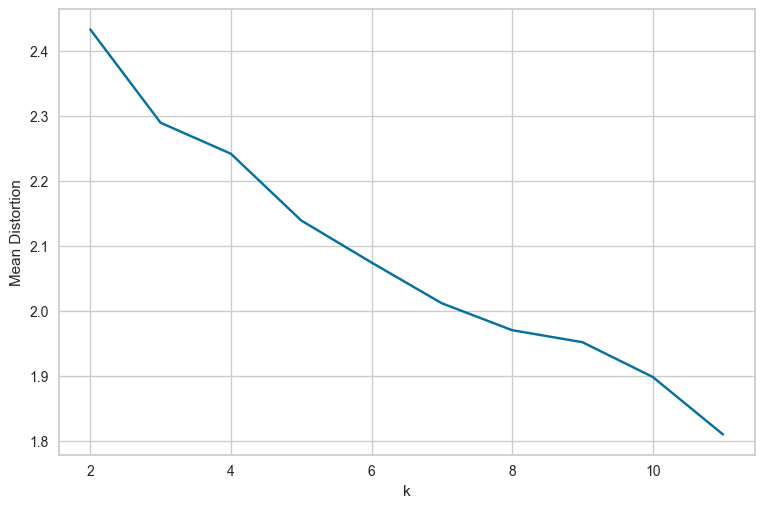

In [342]:
# K mean clustering
#len(df['GICS_Sector'].unique())
#Since we only have 11 sector, we should be able to choose our centroid between 1 to 11
#For perfromance evaluation, I will use mean distortions, the goal for KMean is to minimise it
# https://het.as.utexas.edu/HET/Software/Scipy/cluster.vq.html#:~:text=The%20k%2Dmeans%20algorithm%20tries,of%20centroids%20to%20reduce%20distortion. is used for reference

centroid = range(2,12)
meanDistorition = []
for k in centroid:
    model =  KMeans(n_clusters=k, n_init='auto')
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    distortion=sum(np.min(cdist(df_scaled, model.cluster_centers_, 'euclidean'), axis=1)) / df_scaled.shape[0] #calculates the Euclidean distance between each point in the df_scaled data and the cluster centers
    meanDistorition.append(distortion)
    print(f"When setting K as {k} the average distortion is {distortion}")

plt.plot(centroid, meanDistorition)
plt.xlabel('k')
plt.ylabel('Mean Distortion')

#From above, k = 4, 5 or 6 seem to be reasonable elbow

For k = 2 the silhouette score is 0.49540737069138585
For k = 3 the silhouette score is 0.46976159809750984
For k = 4 the silhouette score is 0.4806875379530603
For k = 5 the silhouette score is 0.447868198894443
For k = 6 the silhouette score is 0.47801051536381023
For k = 7 the silhouette score is 0.4649777851150108
For k = 8 the silhouette score is 0.11533094684778215
For k = 9 the silhouette score is 0.10900521544567626
For k = 10 the silhouette score is 0.1282079339034074
For k = 11 the silhouette score is 0.12776263640837807


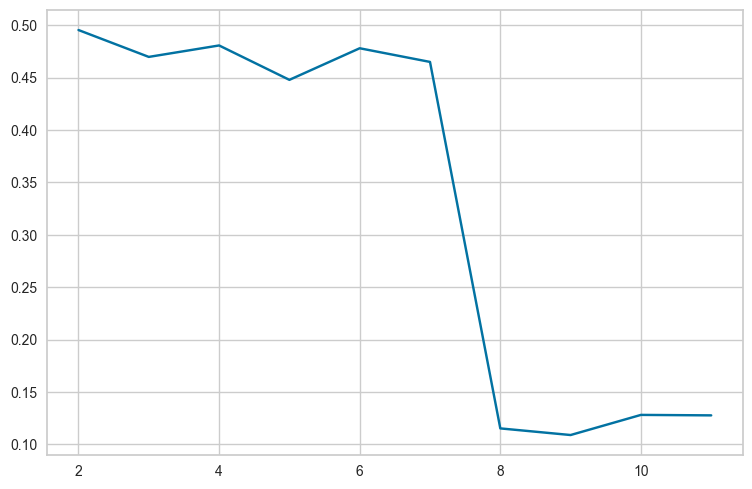

In [354]:
#Now we can evaluate the perfromance using silhouette Score
#Silhouette Score is a metric to evaluate the performance of clustering algorithm. It uses compactness of individual clusters(intra cluster distance) and separation amongst clusters
#https://tushar-joshi-89.medium.com/silhouette-score-a9f7d8d78f29 was used as reference
#For model, we want the socre to be higher
s_score=  []
for k in centroid:
    model =  KMeans(n_clusters=k, n_init='auto')
    model.fit(df_scaled)
    prediction = model.predict(df_scaled)
    score = silhouette_score(df_scaled,prediction)
    s_score.append(score)
    print(f"For k = {k} the silhouette score is {score}")
plt.plot(list(centroid),s_score)
#To support our assumption eariler, k = 4 seems to provided a better seprated culsters

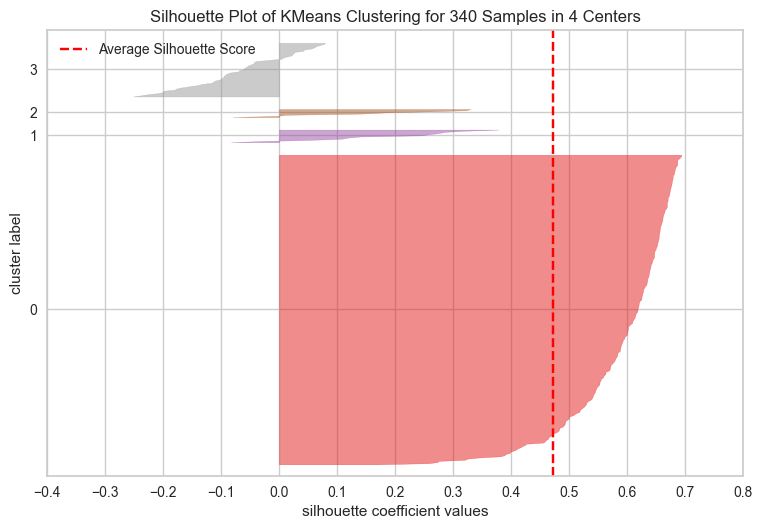

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [355]:
vis = SilhouetteVisualizer(KMeans(4,n_init = 'auto'))
vis.fit(df_scaled)    
vis.show()

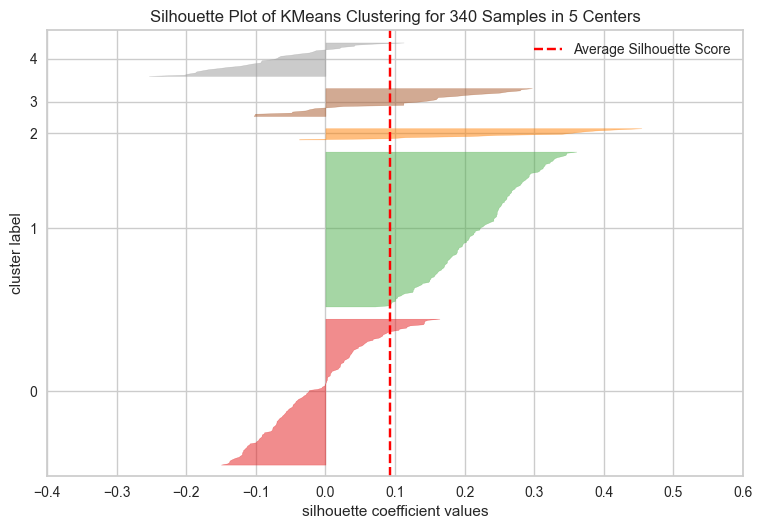

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [356]:
vis = SilhouetteVisualizer(KMeans(5,n_init = 'auto'))
vis.fit(df_scaled)    
vis.show()

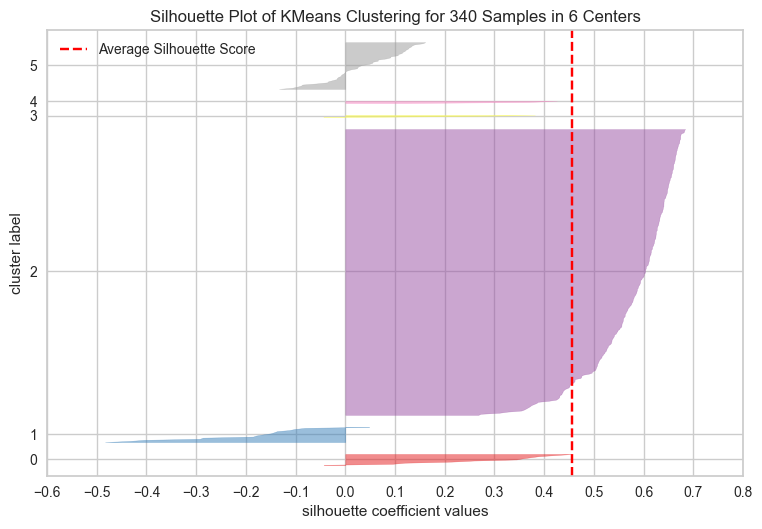

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [357]:
vis = SilhouetteVisualizer(KMeans(6,n_init = 'auto'))
vis.fit(df_scaled)    
vis.show()

In [363]:
# Choosing k=4 clusters
kmeans = KMeans(n_clusters=4,n_init = 'auto', random_state=23)
kmeans.fit_predict(df_scaled)

array([1, 1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 0, 1,
       1, 0, 1, 1, 2, 1, 1, 1, 3, 3, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 3, 1,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 3, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 0, 3, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [365]:
df['K_means_segments'] = kmeans.labels_
df_scaled['K_means_segments'] = kmeans.labels_

In [369]:
cluster_profile = df_scaled.groupby('K_means_segments').mean()
cluster_profile

Current_Price  Price_Change  Volatility       ROE   
K_means_segments                                                      
0                     -0.146771      0.645425    0.079457 -0.119037  \
1                     -0.105987     -0.043871   -0.086165 -0.154980   
2                      4.171665      0.473085    0.272871 -0.259752   
3                     -0.191949     -1.004122    1.498399  3.879639   

                  Cash_Ratio  Net_Cash_Flow  Net_Income  Earnings_Per_Share   
K_means_segments                                                              
0                   1.742306       0.334446    1.154981           -0.001888  \
1                  -0.215672      -0.023418   -0.039750            0.079347   
2                   0.915325       0.099221   -0.213241            1.298082   
3                  -0.328270      -0.404277   -1.912798           -2.633414   

                  Estimated_Shares_Outstanding  PE_Ratio  PB_Ratio  
K_means_segments                                                    
0                                     1.654636  0.011976  0.381782  
1                                    -0.167422 -0.126026 -0.087725  
2                                    -0.492805  3.042914  1.845036  
3                                    -0.188641  0.625840 -0.323261

In [374]:
            sns.boxplot(ax=axes[ii, jj],y=subset_scaled_df[num_cols[counter]],x=subset_scaled_df['K_means_segments'])


NameError: name 'axes' is not defined

In [380]:
len(num_cols)

11

<bound method Figure.tight_layout of <Figure size 2200x1600 with 12 Axes>>

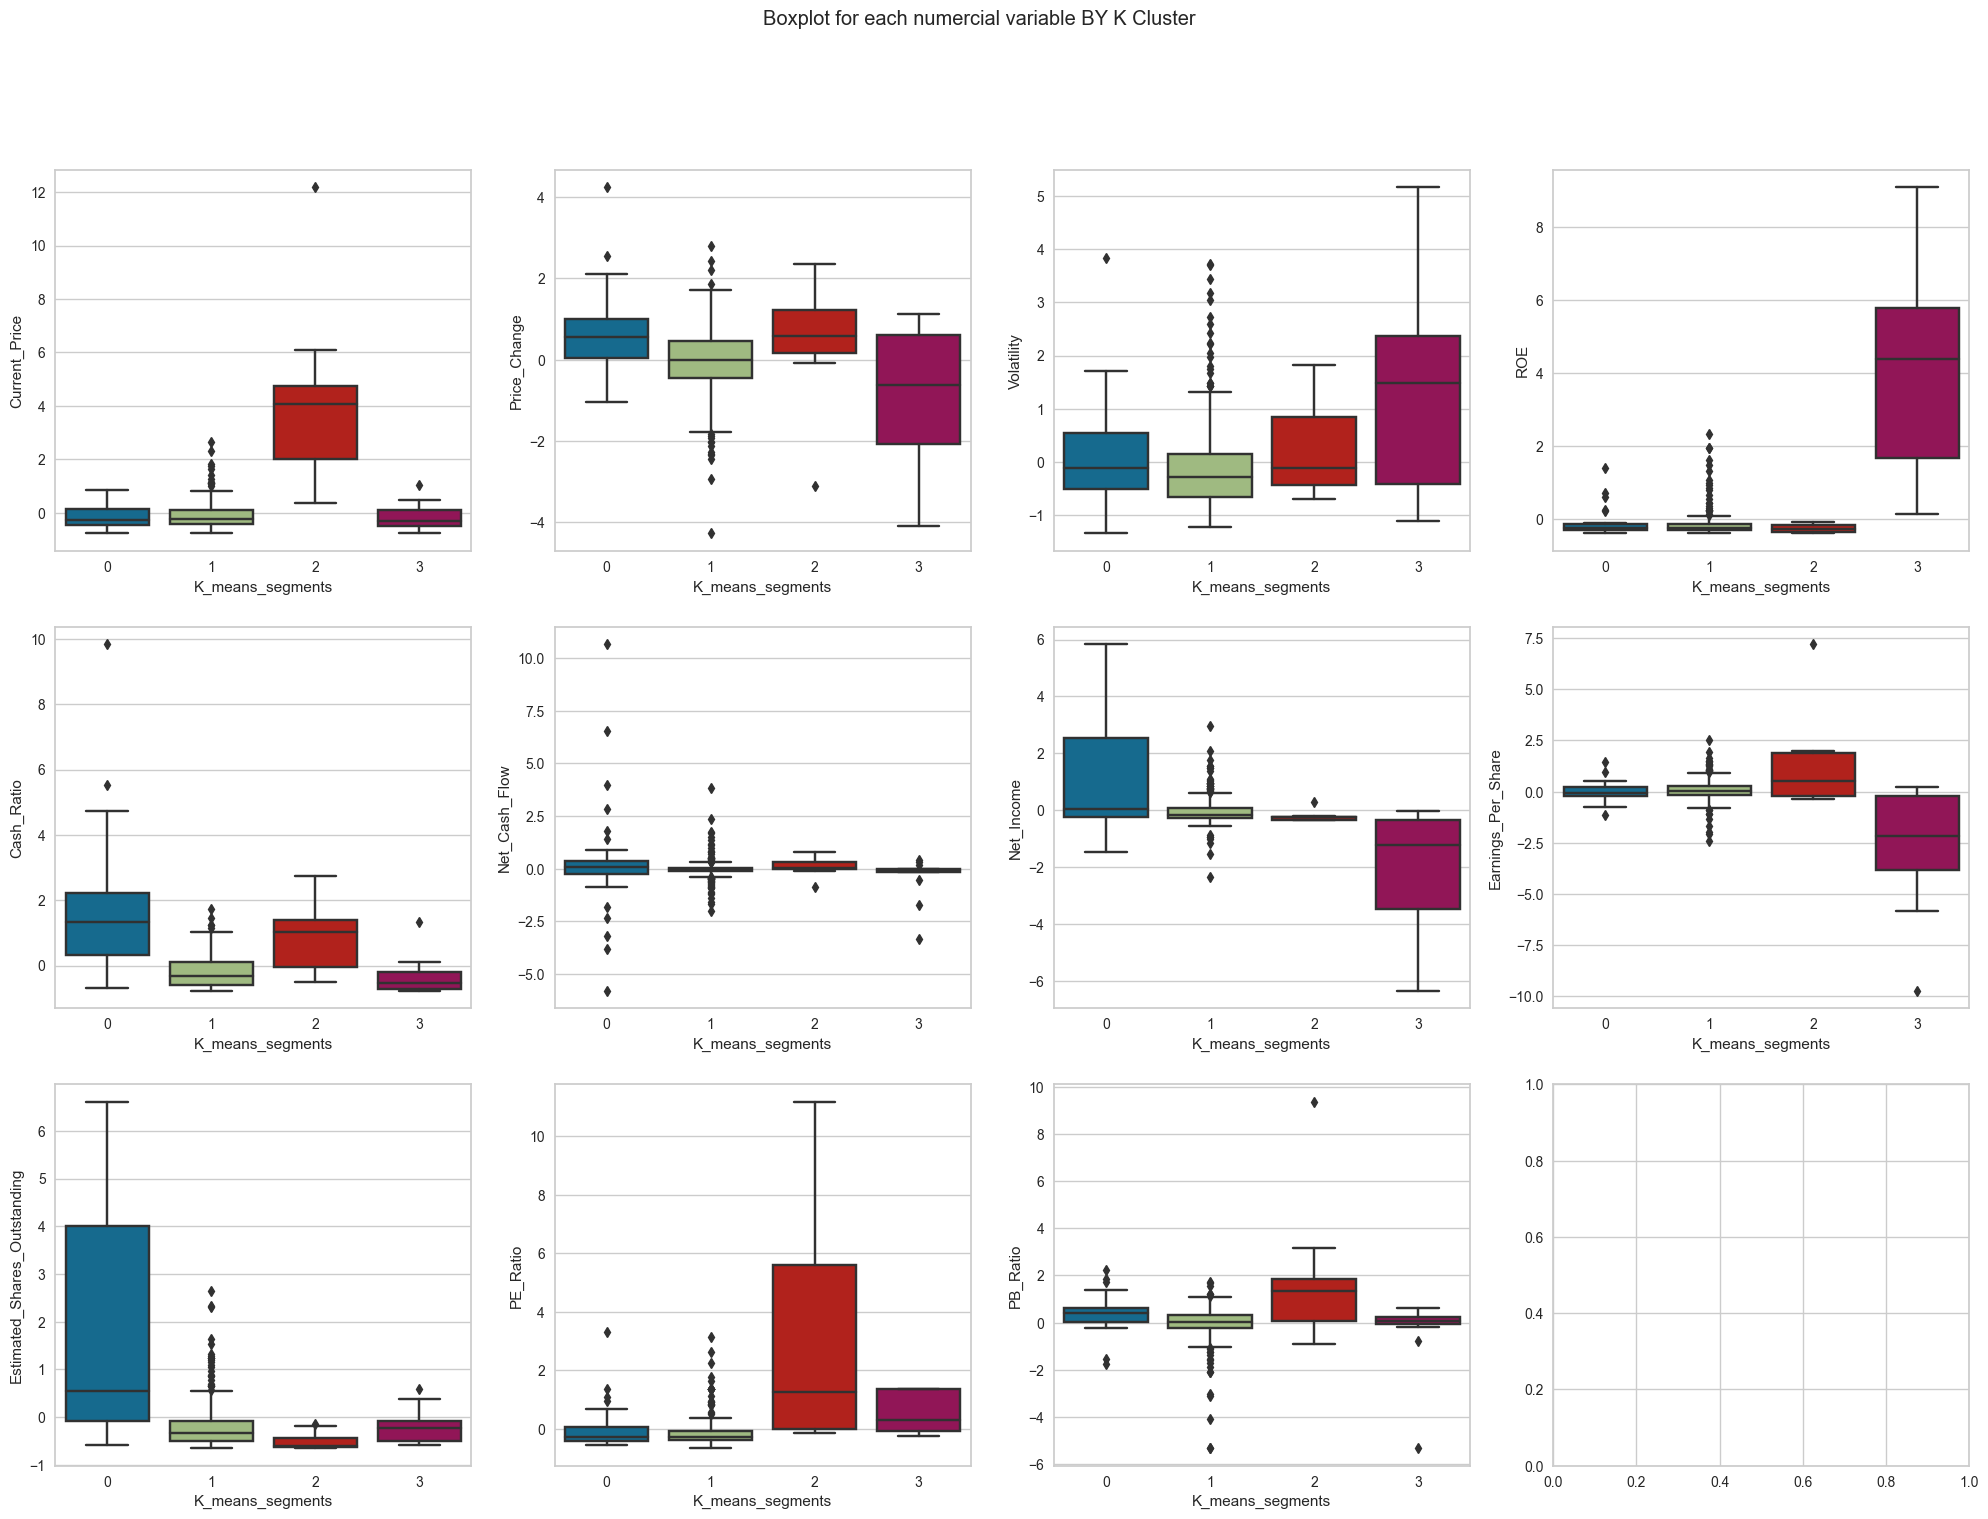

In [383]:
#Plot overall perfromance in boxplot for each segment/cluster
num_for_col = 0
fig,ax = plt.subplots(3,4,figsize = (22,16))
fig.suptitle('Boxplot for each numercial variable BY K Cluster')
for i in range(3):
    for j in range(4):
        if num_for_col < len(num_cols):
            sns.boxplot(ax = ax[i,j],y = df_scaled[num_col[num_for_col]],x = df_scaled['K_means_segments'])
            num_for_col +=1
fig.tight_layout

In [384]:
#Cluster 0

#Cluster 1

#Cluster 2

#Cluster 3

In [386]:
# Comparing cluster vs. GICS_Sector

pd.crosstab(df.GICS_Sector, df.K_means_segments).style.highlight_max(color = 'darkgreen', axis = 0)


In [388]:
#Follow up we want to try out Hierarchical Clustering and compare the perfromance with Kmeans 
#Hierarchical is a bottom up approach where all data start as indiviual cluster then merge base on simliarlity using distance metrics, it was determine by a linkage method
#KMean is centroid based, which use data is randomly clusted around the centroid then it will be reassign to different centroid based on its distance

# Refer to https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for more detail



In [390]:
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]
linkage_methods = ["single", "complete", "average", "weighted"]

#A higher value indicates that the clustering algorithm preserves the pairwise distances well
high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(df_scaled,metric = dm,method= lm)
        # calculate cophenetic correlation
        c,coph_dists =  cophenet(Z,pdist(df_scaled))
        print(f"The Cophenetic Correlation for {dm} distance and {lm} linkage is {c}")
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

# We can see the highest dm,lm pair is euclidean,average with CC 0.9443435280974289

The Cophenetic Correlation for euclidean distance and single linkage is 0.9283454901451149
The Cophenetic Correlation for euclidean distance and complete linkage is 0.7948731654647999
The Cophenetic Correlation for euclidean distance and average linkage is 0.9443435280974289
The Cophenetic Correlation for euclidean distance and weighted linkage is 0.8889875521718184
The Cophenetic Correlation for chebyshev distance and single linkage is 0.9077216003184398
The Cophenetic Correlation for chebyshev distance and complete linkage is 0.715947670059067
The Cophenetic Correlation for chebyshev distance and average linkage is 0.9348864844524323
The Cophenetic Correlation for chebyshev distance and weighted linkage is 0.8454878943367388
The Cophenetic Correlation for mahalanobis distance and single linkage is 0.9291318283892774
The Cophenetic Correlation for mahalanobis distance and complete linkage is 0.7818577243371119
The Cophenetic Correlation for mahalanobis distance and average linkage is 

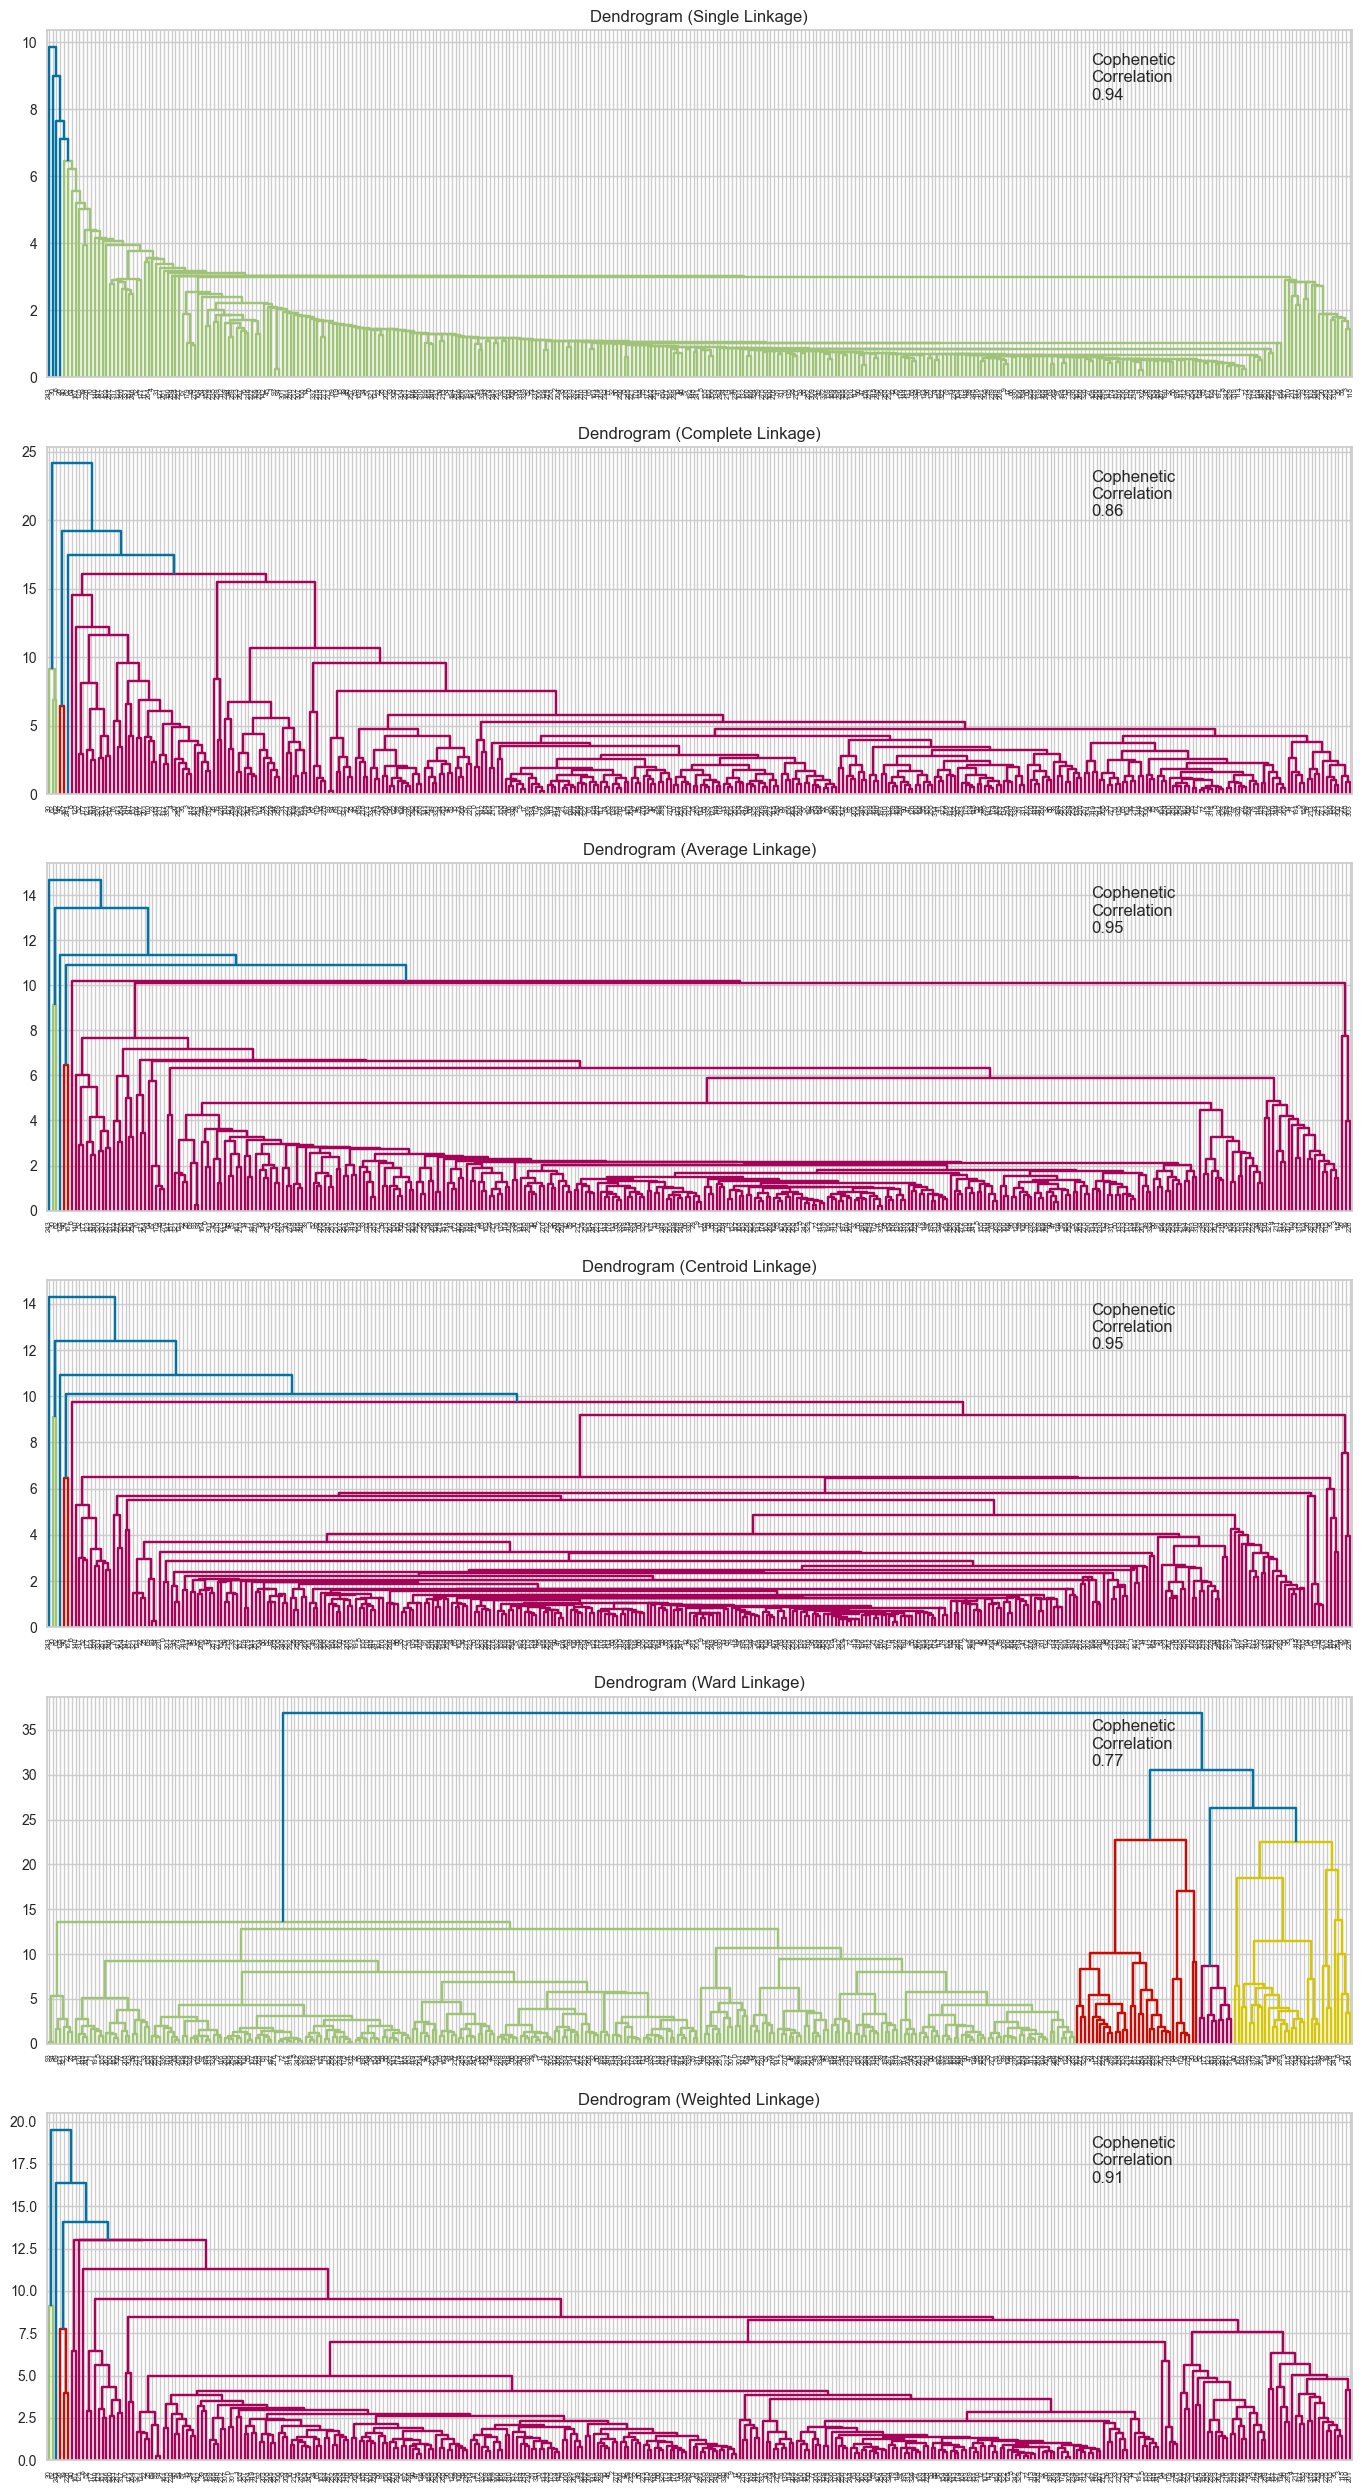

In [394]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )


In [404]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(df_scaled)

/Users/hanli/miniforge3/envs/ds/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [405]:
df_scaled["HC_Clusters"] = HCmodel.labels_
df["HC_Clusters"] = HCmodel.labels_

In [408]:
# let's see the names of the securities in each cluster
for cl in df["HC_Clusters"].unique():
    print(
        "The",
        df[df["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df[df["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")

The 271 Securities in cluster 1 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Alaska Air Group Inc' 'Allstate Corp' 'Applied Materials Inc'
 'AMETEK Inc' 'Affiliated Managers Group Inc' 'Amgen Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'CBRE Group'
 'Crown Castle

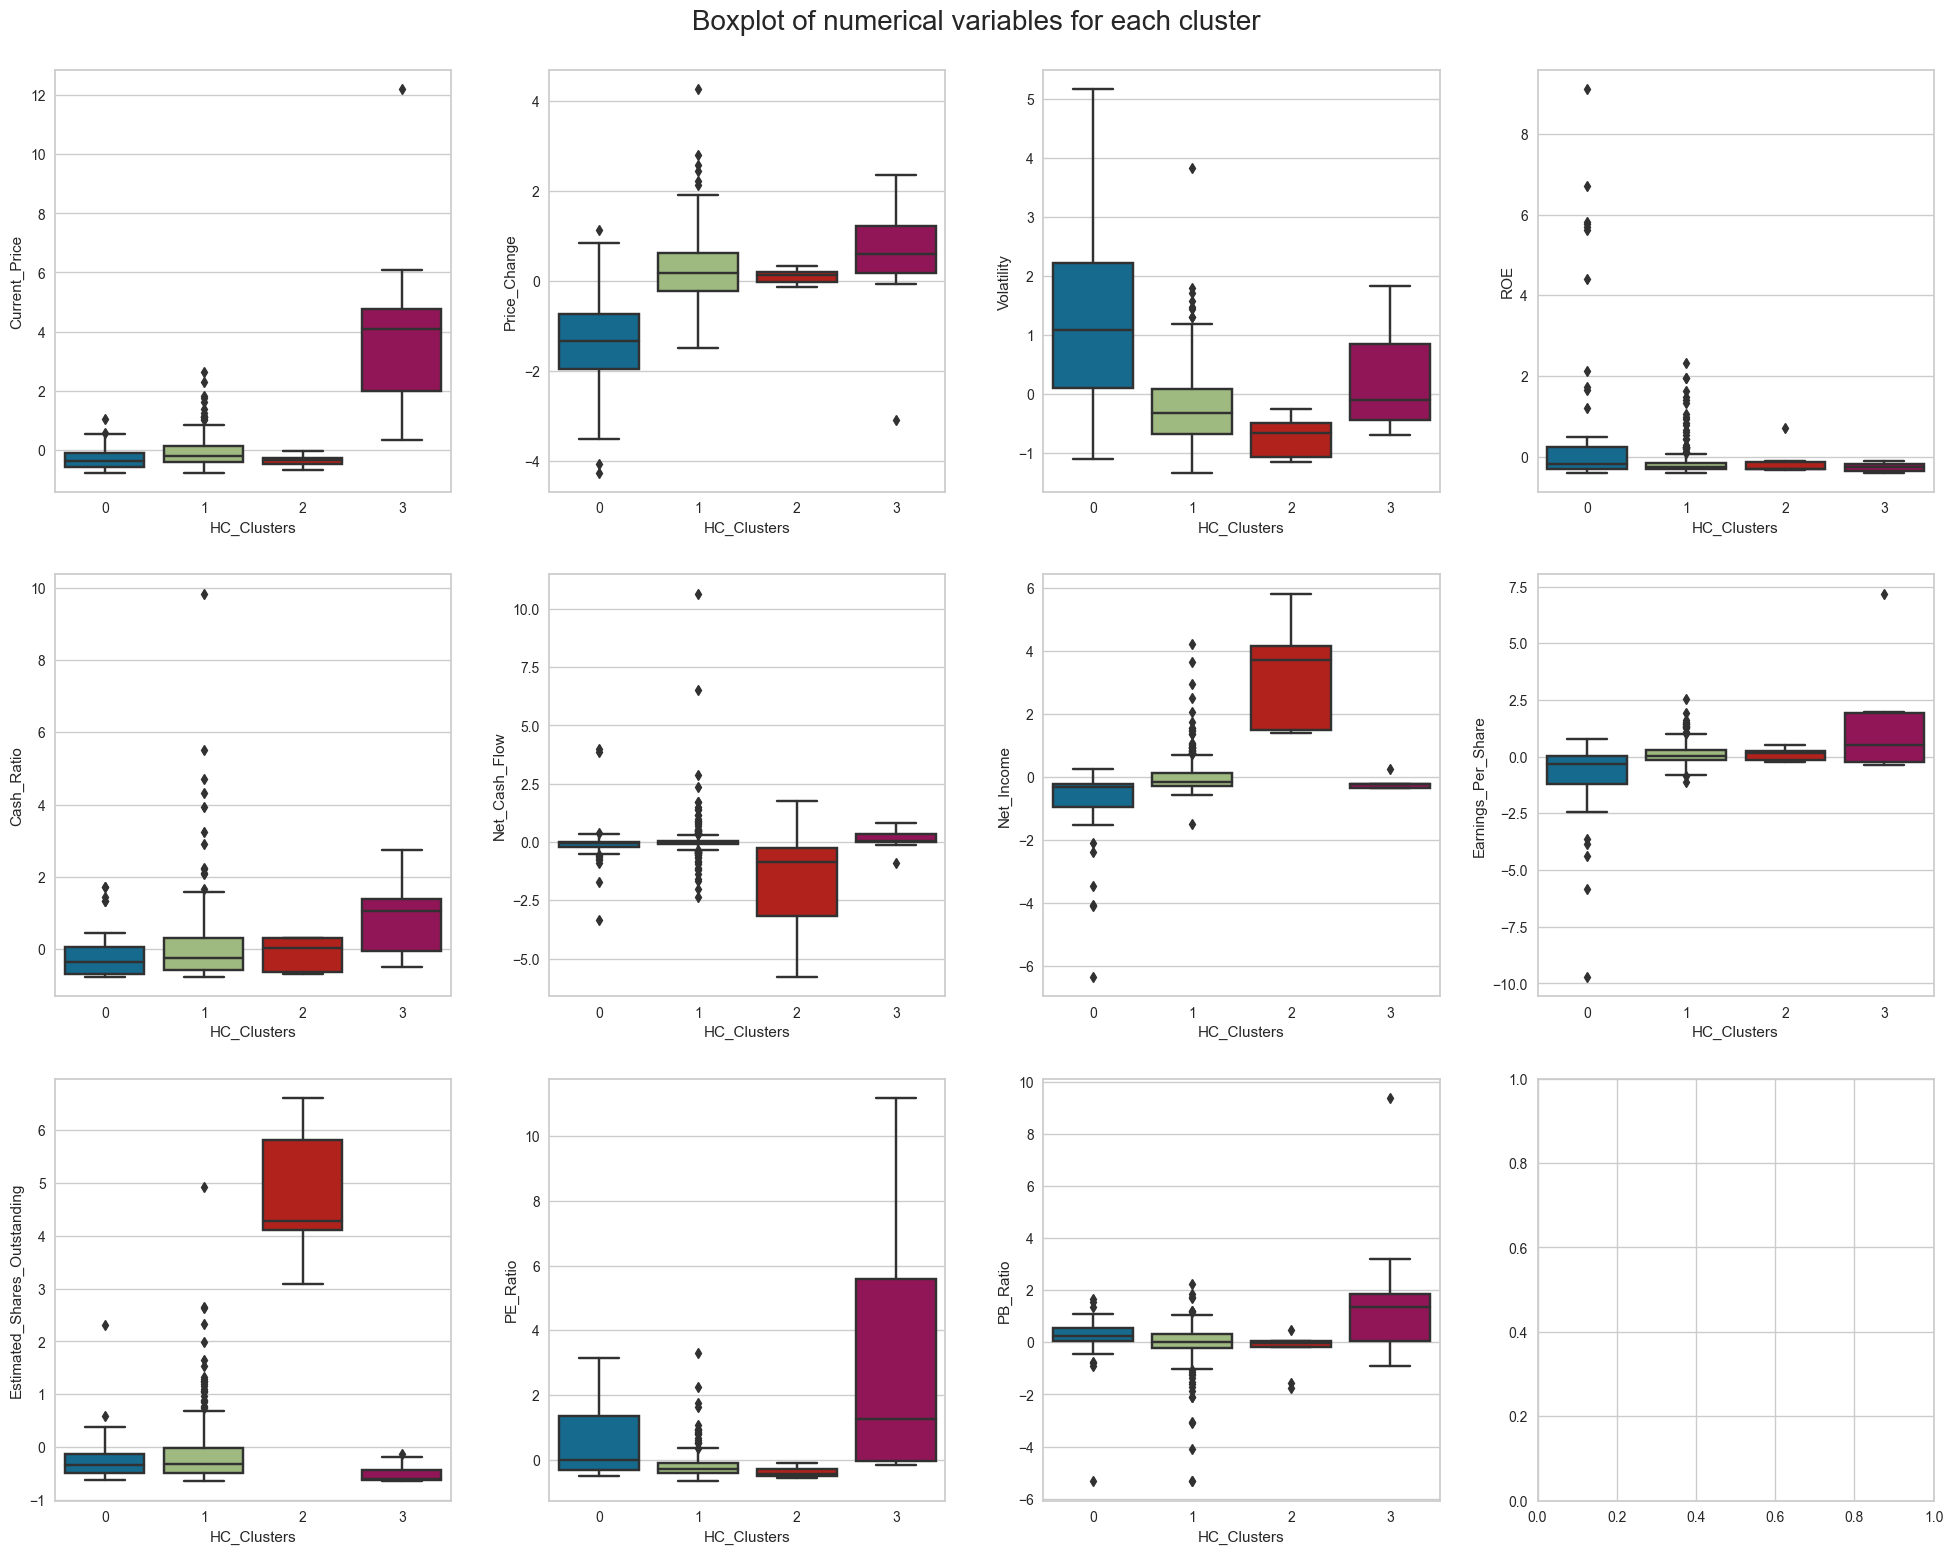

In [410]:
fig, axes = plt.subplots(3, 4,  figsize=(20, 16))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(3):
    for jj in range(4):
        if counter <11:
            sns.boxplot(ax=axes[ii, jj],y=df_scaled[num_cols[counter]],x=df_scaled['HC_Clusters'])
        counter = counter+1

fig.tight_layout(pad=2.0)

In [411]:
pd.crosstab(df.GICS_Sector, df.HC_Clusters).style.highlight_max(color = 'darkgreen', axis = 0)


In [413]:
pd.crosstab(df.K_means_segments, df.HC_Clusters).style.highlight_max(color = 'darkgreen', axis = 0)

In [414]:
# PCA to reduce the data to two dimensions and visualize it to see how well-separated the clusters are

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(df_scaled)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [415]:
reduced_df_pca

Component 1  Component 2
0      -1.150979    -0.873085
1      -0.149218    -0.981842
2      -1.059953    -0.780445
3      -0.392669     1.036099
4       0.190293     0.957399
..           ...          ...
335     0.478430     1.161356
336     0.665327    -0.624271
337     0.428540     0.902180
338     0.323280    -0.189582
339     0.252427     0.486074

[340 rows x 2 columns]

In [416]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()


0.3730253621378102

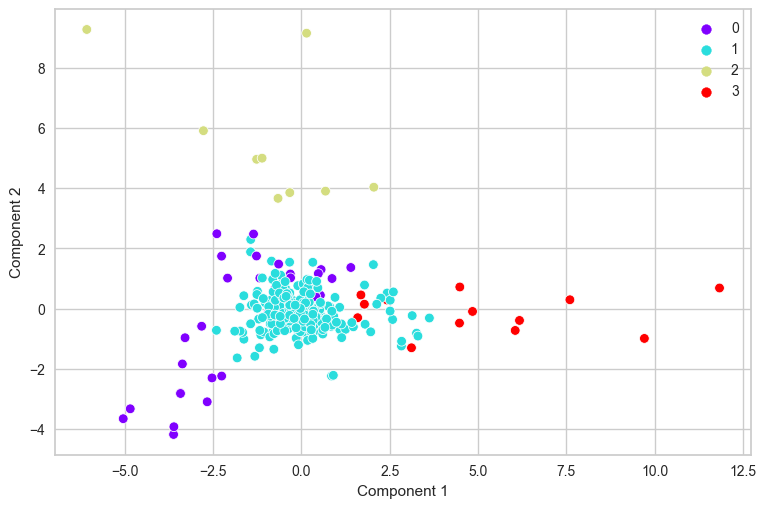

In [417]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["K_means_segments"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

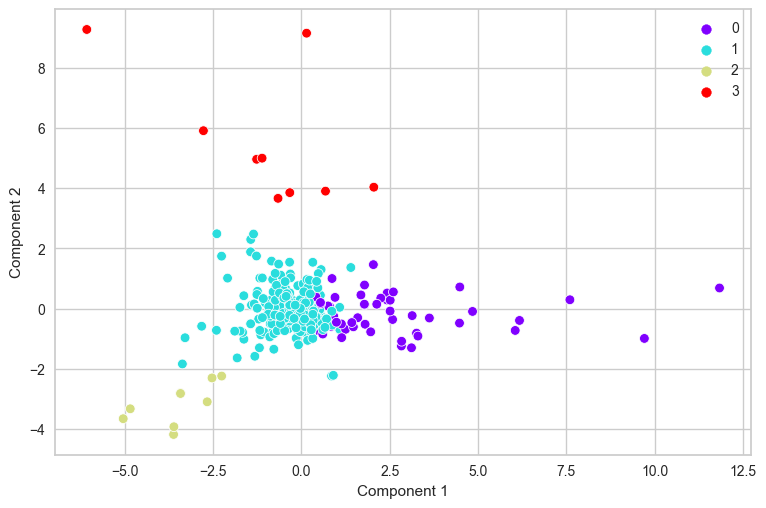

In [418]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))